# Introduction

#### **What is World Inequality 🌎 ?**

World inequality refers to the uneven distribution of income and wealth across individuals, households, and countries.

One common way to describe this imbalance is by looking at the **wealth proportion held by the top 10% of the population**.

#### **In what metrics can Inequality be measured?**

- **Wealth proportion held by the top 10% of the population** :

    If the richest 10% control a very large share of national wealth—say 60-70%—it signals that resources are concentrated in the hands of a few, leaving the majority with far less.

- **Gini Index** : Summarizes inequality in a single number between 0 and 1 (or 0 to 100 when expressed as a percentage).
    - A Gini value of 0 represents perfect equality (everyone has the same income or wealth).
    - Gini value of 1 (or 100) represents maximum inequality (one person holds everything).

#### **What are we going to do ?**

1. We will map Gini Index against countries and choose 6 countries which we will do analysis for.
2. Get World Inequality data from wid.world and Economic database from world bank which contains following data of countries over the years:
    1. GDP per Capita
    2. Unemployment Percentage
    3. Trade Percentage of GDP
    4. Inflation Percentage
    5. Population
    6. Purchase Power Parity to USD (For scaled Plots)
    7. Official Exchange Rate (For scaled Plots)
3. We will clean these datasets, tidy them and merge for analysis and modelling.


## Setup and imports

### Library Imports

This cell imports essential Python libraries: `requests` for making HTTP requests (though not directly used in the current visible code, it's a common data science tool), `pandas` for data manipulation and analysis, and `numpy` for numerical operations.

In [78]:
import requests
import pandas as pd
import numpy as np

### Load Gini Index Data

This cell loads the Gini index data from a CSV file named `API_SI.POV.GINI_DS2_en_csv_v2_296215.csv` into a pandas DataFrame called `gini`. The `.head()` method is then used to display the first few rows, providing a quick preview of the dataset's structure and content.

In [79]:
import pandas as pd

gini = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_296215.csv')
gini.head()

Country Name Country Code Indicator Name Indicator Code  \
0                        Aruba          ABW     Gini index    SI.POV.GINI   
1  Africa Eastern and Southern          AFE     Gini index    SI.POV.GINI   
2                  Afghanistan          AFG     Gini index    SI.POV.GINI   
3   Africa Western and Central          AFW     Gini index    SI.POV.GINI   
4                       Angola          AGO     Gini index    SI.POV.GINI   

   1960  1961  1962  1963  1964  1965  ...  2016  2017  2018  2019  2020  \
0   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN  51.3   NaN   NaN   

   2021  2022  2023  2024  Unnamed: 69  
0   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

### Clean and Tidy Gini Data

This cell performs data cleaning and tidying operations on the `gini` DataFrame:
- It drops an irrelevant 'Unnamed: 69' column if it exists.
- It identifies and melts the year-specific columns into two new columns: 'year' and 'gini_value'. This transforms the data from a wide format to a long (tidy) format, which is more suitable for time-series analysis and visualization.
- The 'year' column is then converted to an integer type for proper numerical handling.
- Finally, it displays the head of the newly created `gini_tidy` DataFrame.

In [80]:
# Drop the 'Unnamed: 69' column if it exists and is irrelevant
if 'Unnamed: 69' in gini.columns:
    gini = gini.drop(columns=['Unnamed: 69'])

# Identify the columns that represent years (they are numeric strings)
year_columns = [col for col in gini.columns if col.isdigit() ]

# Identify the identifier columns
id_vars = [col for col in gini.columns if col not in year_columns]

# Melt the DataFrame to transform year columns into rows
gini_tidy = gini.melt(id_vars=id_vars, value_vars=year_columns, var_name='year', value_name='gini_value')

# Convert 'year' column to integer type
gini_tidy['year'] = pd.to_numeric(gini_tidy['year'])

# Display the head of the tidied DataFrame
display(gini_tidy.head())

Country Name Country Code Indicator Name Indicator Code  \
0                        Aruba          ABW     Gini index    SI.POV.GINI   
1  Africa Eastern and Southern          AFE     Gini index    SI.POV.GINI   
2                  Afghanistan          AFG     Gini index    SI.POV.GINI   
3   Africa Western and Central          AFW     Gini index    SI.POV.GINI   
4                       Angola          AGO     Gini index    SI.POV.GINI   

   year  gini_value  
0  1960         NaN  
1  1960         NaN  
2  1960         NaN  
3  1960         NaN  
4  1960         NaN

### Prepare Gini Data for Plotting

Refine the `gini_tidy` DataFrame to prepare it for visualization:
- Removes rows with NaN as `gini_value`
- Get latest year with valid gini value for each country.

The `gini_tidy` DataFrame now has a 'year' column, making it easier to analyze time-series data for Gini index values.

In [81]:
# Filter out rows with NaN gini_value
gini_no_nan = gini_tidy.dropna(subset=['gini_value'])

# Find the highest year for each country and use it to filter
gini_plot_data = gini_no_nan.loc[gini_no_nan.groupby('Country Name')['year'].idxmax()]

print(f"Data for the highest available year per country:")
print(gini_plot_data.shape)
gini_plot_data.head()

Data for the highest available year per country:
(171, 6)


Country Name Country Code Indicator Name Indicator Code  year  \
15965      Albania          ALB     Gini index    SI.POV.GINI  2020   
13626      Algeria          DZA     Gini index    SI.POV.GINI  2011   
15432       Angola          AGO     Gini index    SI.POV.GINI  2018   
17033    Argentina          ARG     Gini index    SI.POV.GINI  2024   
16768      Armenia          ARM     Gini index    SI.POV.GINI  2023   

       gini_value  
15965        29.4  
13626        27.6  
15432        51.3  
17033        42.4  
16768        27.2

In [82]:
gini_plot_data.gini_value.min(), gini_plot_data.gini_value.max()

(23.8, 63.0)

### Visualize Global Gini Index (Choropleth Map)

We will generate an interactive map to visualize the latest available Gini index for countries worldwide

In [83]:
import plotly.express as px

# Create the choropleth map for gini value of country
fig = px.choropleth(
    gini_plot_data,
    locations='Country Code',
    color='gini_value',
    hover_name='Country Name',
    color_continuous_scale = [(0.0, "#2166ac"), (0.5, "#f7f7f7"), (1.0, "#b2182b")], #'spectral_r', # Changed colorscale to blue-to-red
    range_color=[20, 60],
    title='LatestGlobal Gini Index (Blue to Red: 20 to 60)',
    # projection='natural earth'
)

fig.update_layout(
    title={
        'text': "Global Gini Index (Latest Available Year)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    margin=dict(l=20, r=20, t=80, b=20),
    width=1500,       # Size control
    height=800,       # Size control
    paper_bgcolor='white',
)

# --------- Improve country borders ----------
fig.update_geos(
    showcountries=True,
    countrycolor="rgba(80,80,80,0.4)",
    showcoastlines=True,
    coastlinecolor="rgba(50,50,50,0.4)",
    projection_scale=0.95,
)

# --------- Improve colorbar ----------
fig.update_coloraxes(
    colorbar=dict(
        title="Gini Index",
        tickvals=[20, 30, 40, 50, 60],
        ticks="outside",
        len=0.75,
        thickness=20,
    )
)
fig.show()

This map reveals how inequality differs among countries. From these patterns, we identified six major nations to analyze further, as they fall into diverse inequality groups
1. China
2. India
3. United States of America
4. South Africa
5. Germany
6. South Korea

### Load and Process WID Income Distribution Data
Now we load income distribution data from wid.world (for each of our selected countries) across years into a single DataFrame. We then apply following modifcations to make it more readable:
- Filters for the variable 'sptincj999' (pretax income share, all ages) because we are interested in pretax income for all ages:
    WID variable codes follow a structured format:
    - **s** → Share (the variable measures a share of income/wealth).
    - **ptinc** → Pretax income (income before taxes and transfers).
    - **j** → Equal-split adults (income is split equally between partners in a household).
    - **992 vs. 999** → Age group codes:
        - 992 = Adults only (age 20+)
        - 999 = All ages (entire population, including children)
- The 'percentile' column is broken to 2 seperate columns denoting range of percentile (e.g., 'p90p100' becomes `p_start=90`, `p_end=100`).
- Now we only keep the top 10%, top 1%, top 0.1%, and bottom 50% income shares because they are the common true indicators of inequality.

In [116]:
import pandas as pd

country_codes = ['IN', 'CN', 'US', 'ZA', 'DE', 'KR']

dfs = []
for code in country_codes:
    df = pd.read_csv(f"WID_data_{code}.csv", sep=";")
    dfs.append(df)

df_combined = pd.concat(dfs, ignore_index=True)

#filtering for valriable = "sptincj999" to filter out the income share stats
income_df = df_combined[df_combined['variable'] == 'sptincj999'].copy()
income_df.reset_index(drop=True, inplace=True)
pattern = r'^p(\d+\.?\d*)p(\d+\.?\d*)$'

income_df[['p_start', 'p_end']] = (
    income_df['percentile']
    .str.extract(pattern)
    .astype(float)
)
# Filtering top 10%, top 1%, top 0.1%, and bottom 50%
top_10 = income_df[(income_df['p_start'] == 90) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_1 = income_df[(income_df['p_start'] == 99) & (income_df['p_end'] == 100)].reset_index(drop=True)
top_0_1 = income_df[(income_df['p_start'] == 99.9) & (income_df['p_end'] == 100)].reset_index(drop=True)
bottom_50 = income_df[(income_df['p_start'] == 0) & (income_df['p_end'] == 50)].reset_index(drop=True)

df_income_summary = pd.concat([top_10, top_1, top_0_1, bottom_50], ignore_index=True)
df_income_summary['income_distribution'] = np.where(df_income_summary['p_start'] == 90, 'top_10%',
                                        np.where(df_income_summary['p_start'] == 99, 'top_1%',
                                        np.where(df_income_summary['p_start'] == 99.9, 'top_0.1%',
                                        np.where(df_income_summary['p_start'] == 0, 'bottom_50%', 'other'))))
print(df_income_summary.head(5))
print(income_df.head(5))

  country    variable percentile  year   value  age pop  p_start  p_end  \
0      IN  sptincj999    p90p100  1820  0.4800  999   j     90.0  100.0   
1      IN  sptincj999    p90p100  1850  0.5000  999   j     90.0  100.0   
2      IN  sptincj999    p90p100  1880  0.5460  999   j     90.0  100.0   
3      IN  sptincj999    p90p100  1900  0.5376  999   j     90.0  100.0   
4      IN  sptincj999    p90p100  1910  0.4480  999   j     90.0  100.0   

  income_distribution  
0             top_10%  
1             top_10%  
2             top_10%  
3             top_10%  
4             top_10%  
  country    variable percentile  year   value  age pop  p_start  p_end
0      IN  sptincj999     p4p100  1820  0.9911  999   j      4.0  100.0
1      IN  sptincj999     p4p100  1850  0.9922  999   j      4.0  100.0
2      IN  sptincj999     p4p100  1880  0.9982  999   j      4.0  100.0
3      IN  sptincj999     p4p100  1900  0.9982  999   j      4.0  100.0
4      IN  sptincj999     p4p100  1910  0.991

In [115]:
income_df[income_df['country']=='DE']

country    variable percentile  year   value  age pop  p_start  p_end
121579      DE  sptincj999       p0p1  1820  0.0006  999   j      0.0    1.0
121580      DE  sptincj999       p0p1  1850  0.0007  999   j      0.0    1.0
121581      DE  sptincj999       p0p1  1880  0.0005  999   j      0.0    1.0
121582      DE  sptincj999       p0p1  1900  0.0004  999   j      0.0    1.0
121583      DE  sptincj999       p0p1  1910  0.0003  999   j      0.0    1.0
...        ...         ...        ...   ...     ...  ...  ..      ...    ...
143257      DE  sptincj999       p0p0  1930  0.0000  999   j      0.0    0.0
143258      DE  sptincj999       p0p0  1940  0.0000  999   j      0.0    0.0
143259      DE  sptincj999       p0p0  1950  0.0000  999   j      0.0    0.0
143260      DE  sptincj999       p0p0  1960  0.0000  999   j      0.0    0.0
143261      DE  sptincj999       p0p0  1970  0.0000  999   j      0.0    0.0

[21683 rows x 9 columns]

### Generate Lorenz Curves

We will prepare the data and plot Lorenz curves for selected countries and years:
- **Lorenz Curve** shows how much of total income is cumulatively earned by the bottom x% of the population, compared to a line of perfect equality.
- A dashed black line representing perfect equality (where `y=x`) is added for comparison.
- The further the curve bends away from that equality line, the greater the inequality.

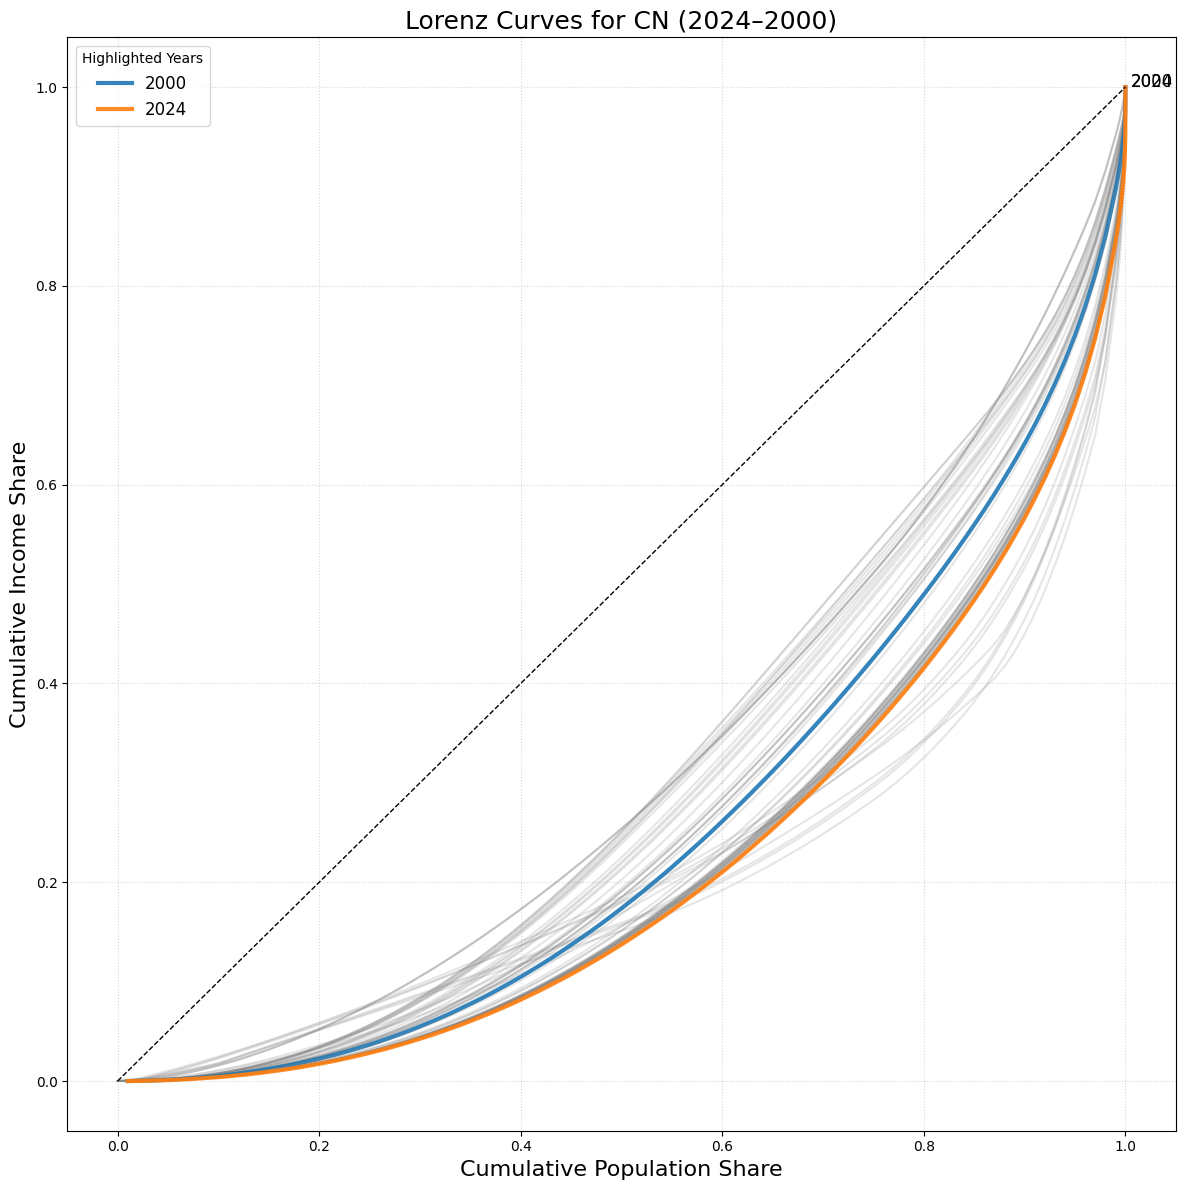

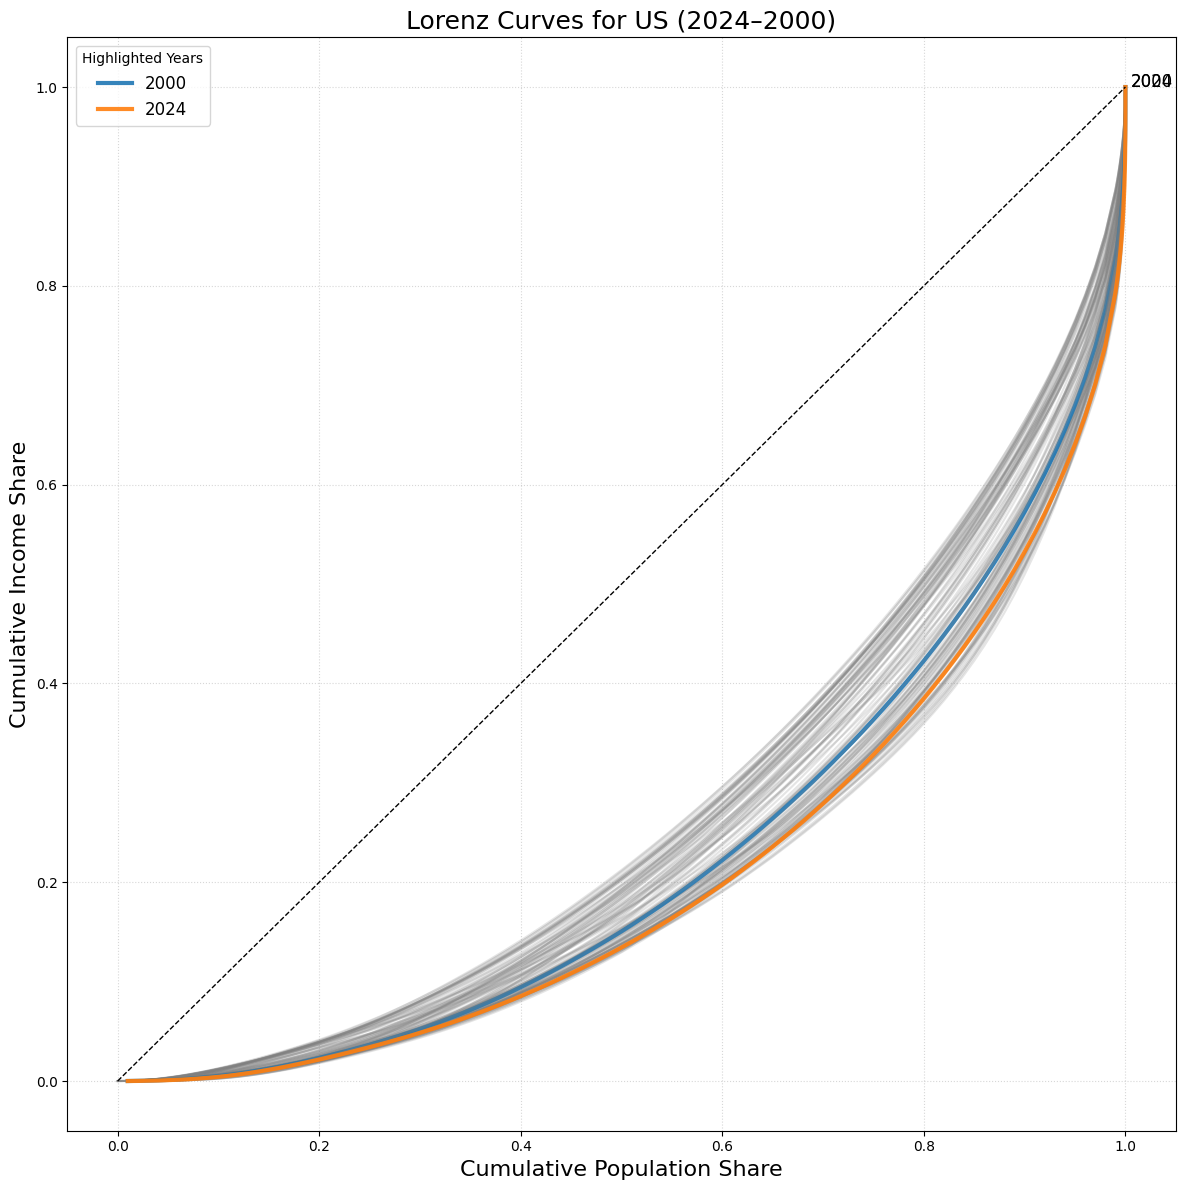

/tmp/ipython-input-1895099451.py:52: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



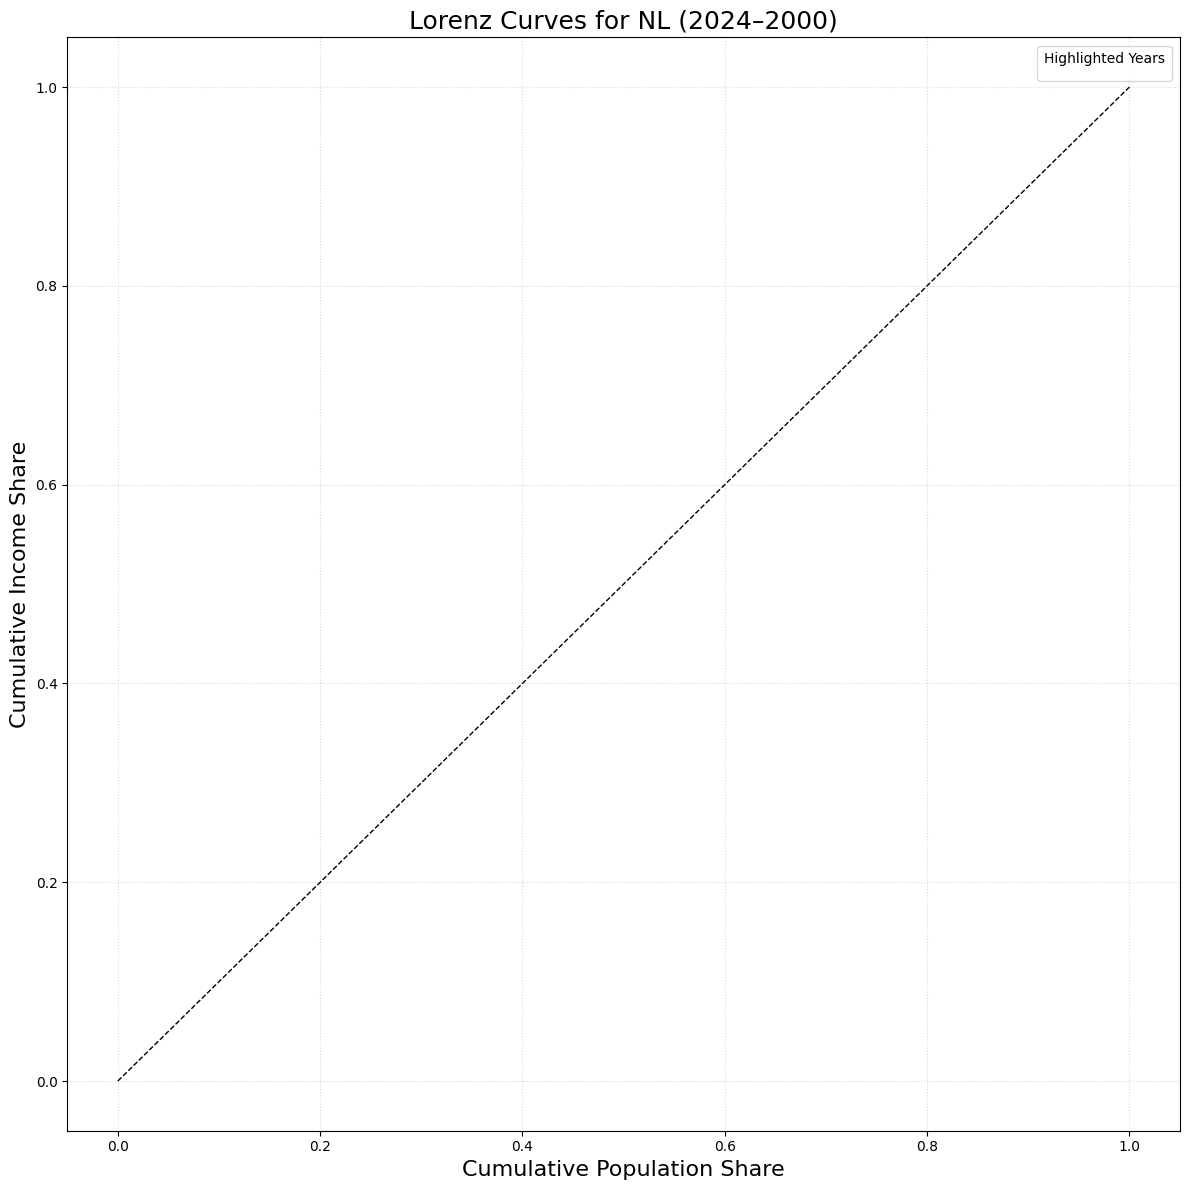

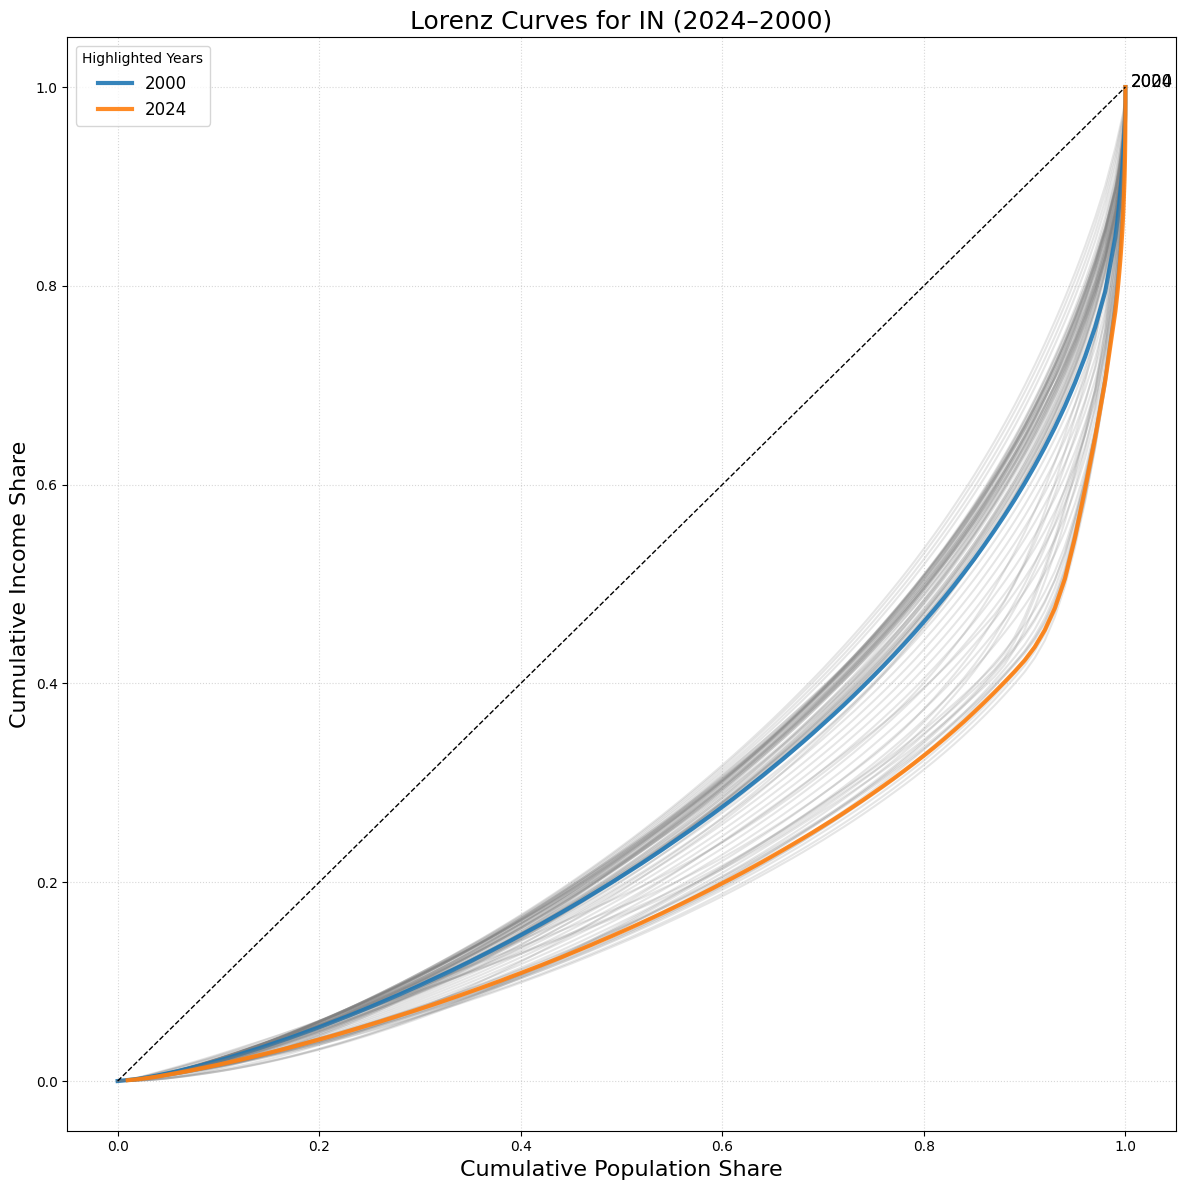

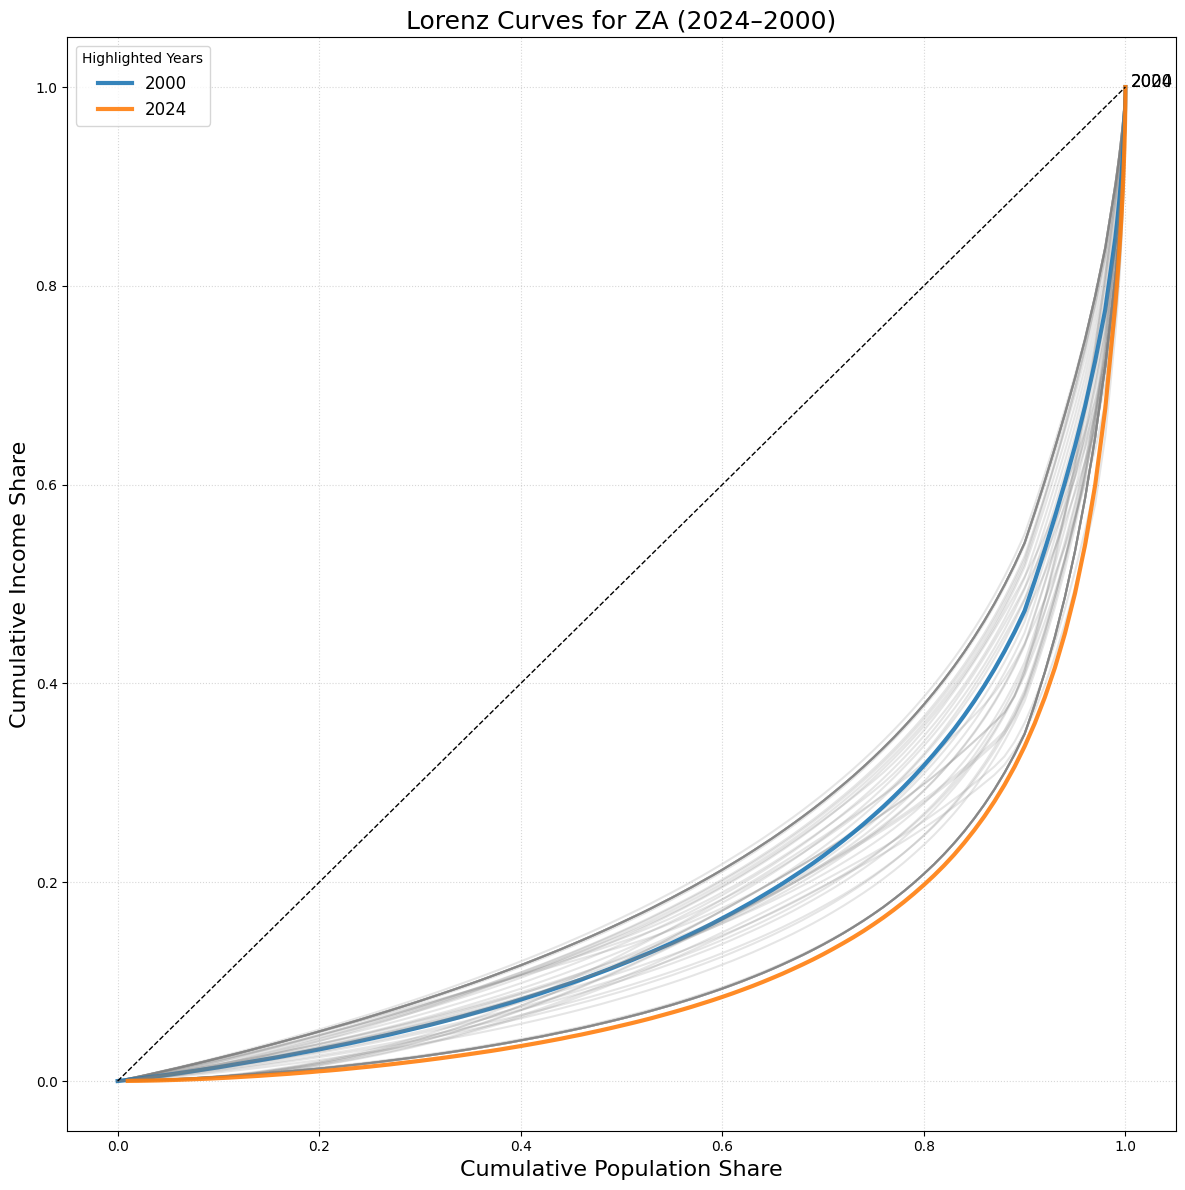

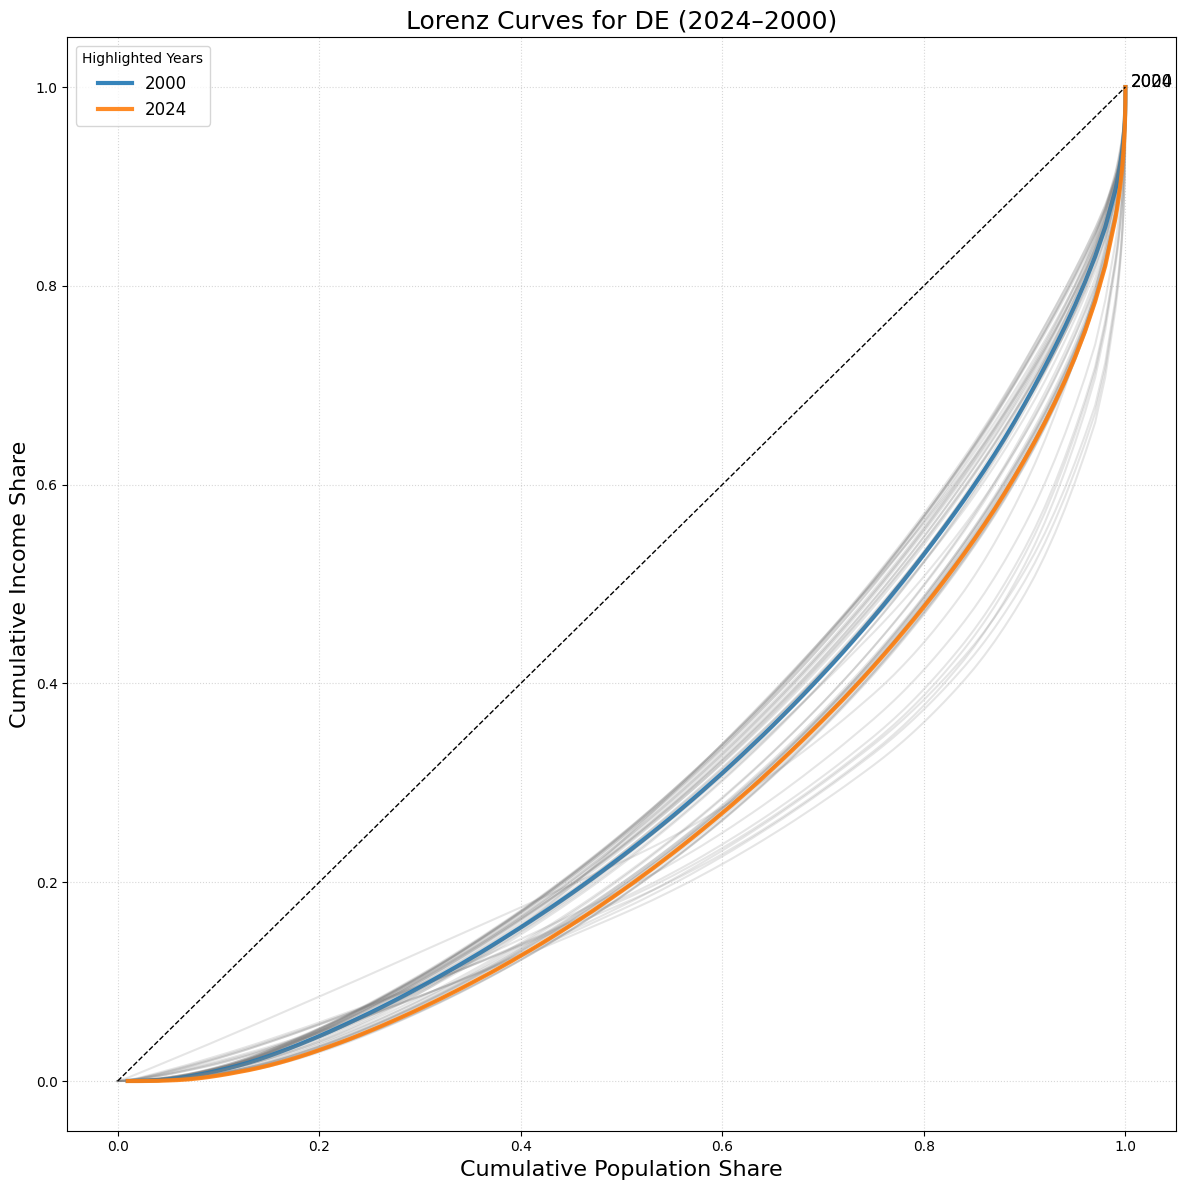

In [86]:
import matplotlib.pyplot as plt

# 2. Parse percentile "p0p10" -> p_start=0, p_end=10
def extract_bounds(s):
    s = s[1:]              # drop leading 'p'
    a, b = s.split('p')
    return float(a), float(b)

# 3. Keep only rows starting at 0% (these are cumulative bottom shares)
lorenz_points = income_df[income_df['p_start'] == 0].copy()

# 4. Convert to fractions 0–1
lorenz_points['cum_pop']    = lorenz_points['p_end'] / 100.0   # x-axis
lorenz_points['cum_income'] = lorenz_points['value']           # y-axis (already cumulative)

country_code = ['CN', 'US', 'NL', 'IN', 'ZA', 'DE']
for code in country_code:

    # Get available years for IN
    years = sorted(lorenz_points[lorenz_points['country']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 2000

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = lorenz_points[(lorenz_points['country']==code) & (lorenz_points['year']==year)]
        df_cnt = df_cnt.sort_values('cum_pop')

        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['cum_pop'].iloc[-1] + 0.005,
                    df_cnt['cum_income'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['cum_pop'], df_cnt['cum_income'],
                    color="gray", alpha=0.2)

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Lorenz Curves for {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Income Share", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"lorenz_cured_{code}.png")
    plt.show()


### Pivot Income Summary Data

Now we will transform the DataFrame to a wide format using `pivot_table` to make it easier for analysis and modelling.

This causes `income_distribution` categories (e.g., `bottom_50%`, `top_10%`, `top_1%`) to become new columns.

In [87]:
df_wide = df_income_summary.pivot_table(
    index=['country','year'],
    columns='income_distribution',
    values='value'
).reset_index(drop=False)
df_wide.head(5)

income_distribution country  year  bottom_50%  top_0.1%  top_1%  top_10%
0                        CN  1820      0.1855    0.0527  0.1616   0.4648
1                        CN  1850      0.1812    0.0572  0.1735   0.4772
2                        CN  1880      0.1594    0.0560  0.1761   0.5124
3                        CN  1900      0.1571    0.0573  0.1784   0.5161
4                        CN  1910      0.1691    0.0720  0.2026   0.5120

In [88]:
df_wide.country.unique()

array(['CN', 'DE', 'IN', 'KR', 'US', 'ZA'], dtype=object)

### Visualize Income Share Trends Over Time

This cell generates stacked bar charts to visualize the trend of income shares (bottom 50%, top 10%, top 1%) over time for selected countries:
- It iterates through the specified `country_code` list.
- For each country, it filters `df_income_summary` for years from 1952 onwards and pivots the data to have years as the index and income distribution categories as columns.
- It then plots stacked bars where the `bottom_50%` share is plotted from 0, the `top_10%` is plotted from `1 - top10`, and `top_1%` is plotted from `1 - top1`.
- Custom colors are used to distinguish the different income groups.
- The y-axis is set from 0 to 1 (representing 0% to 100% of national income).
- Titles, labels, legend, and grid are added for clarity, and each plot is saved as a PNG image.

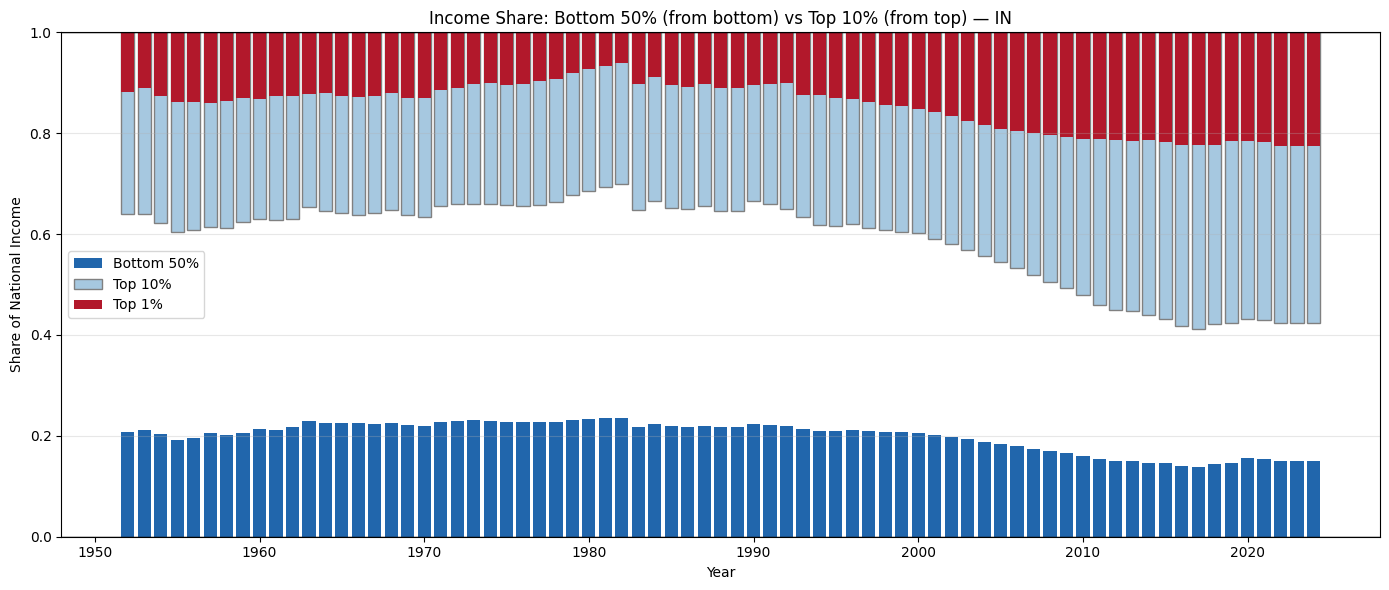

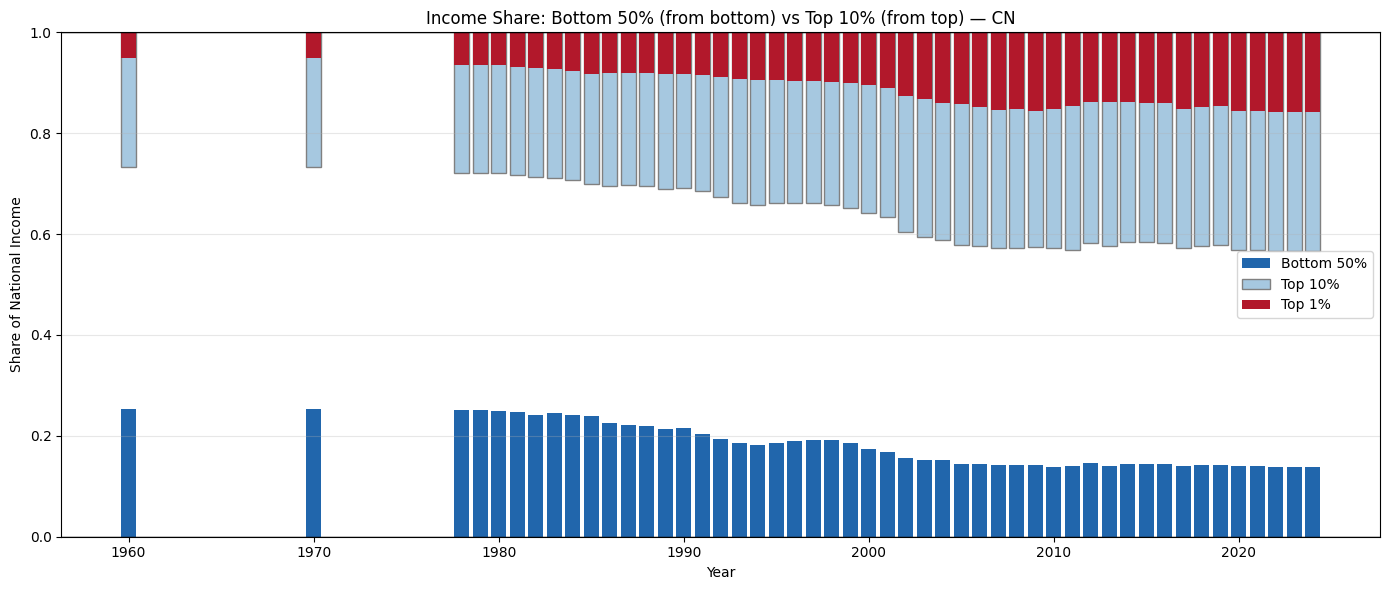

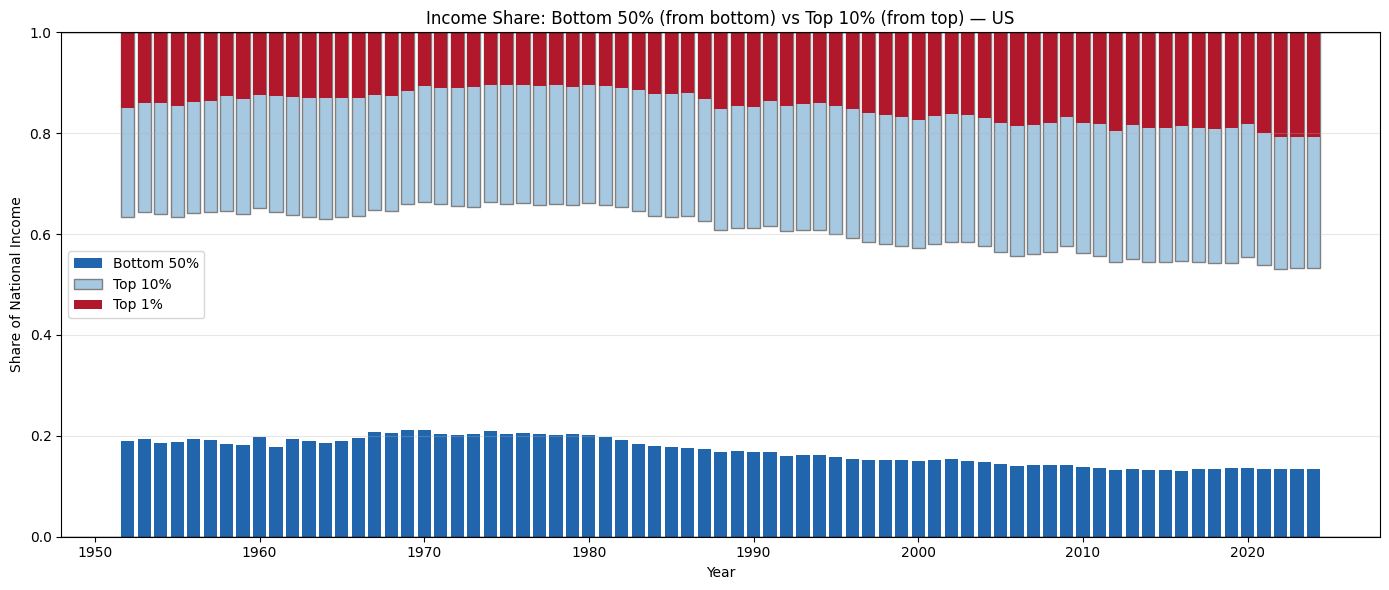

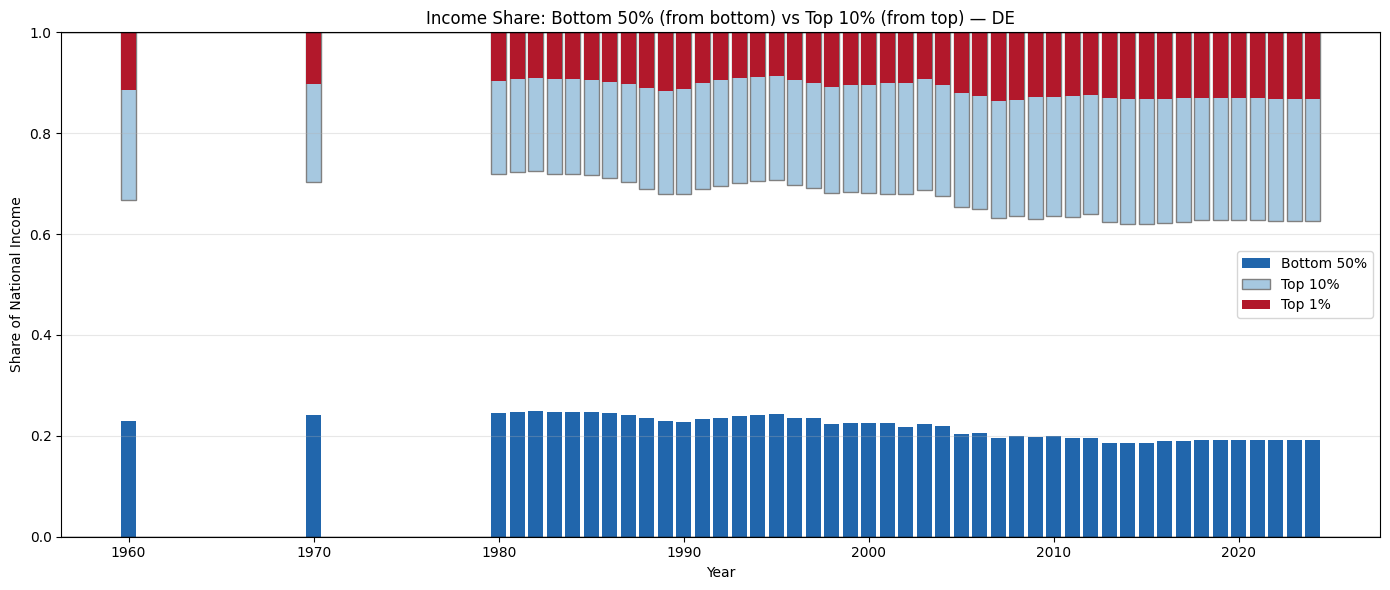

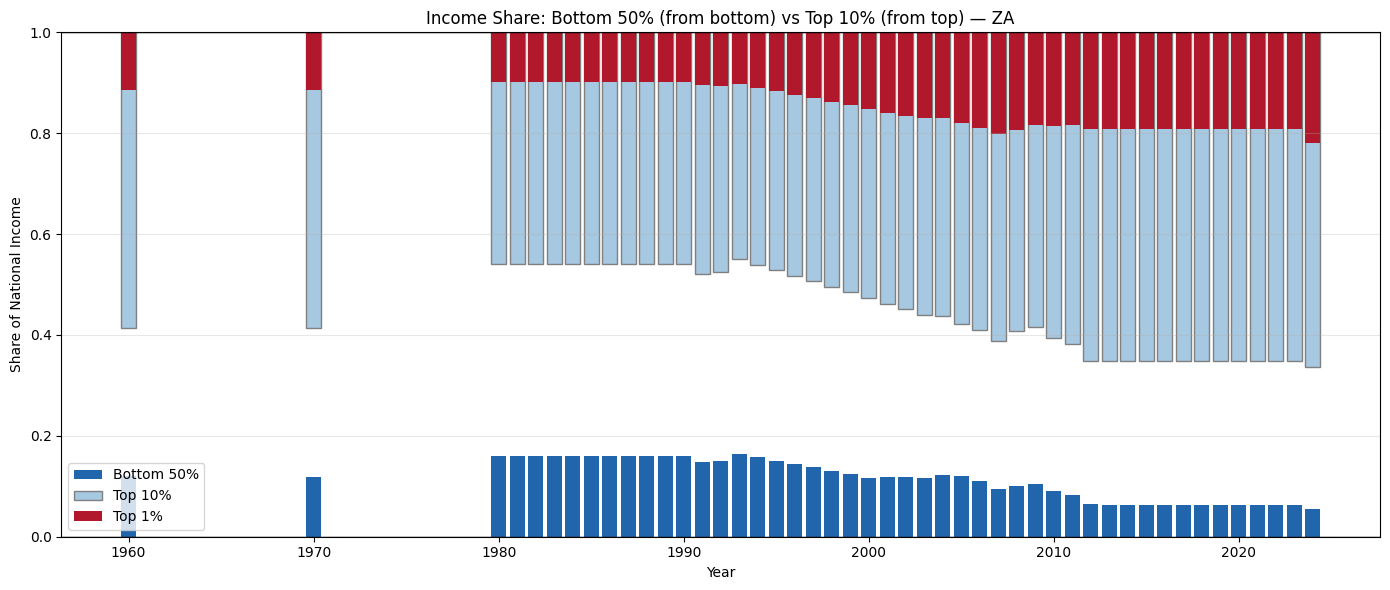

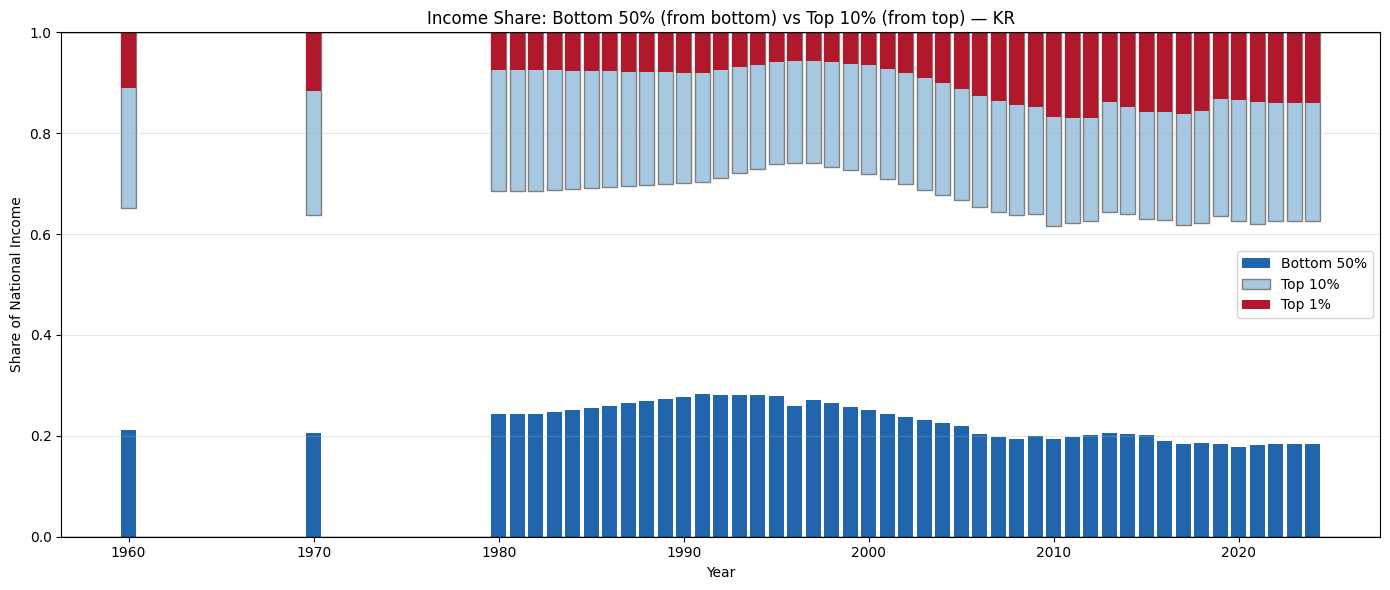

In [89]:
import matplotlib.pyplot as plt
bottom50_color = "#2166ac"   # blue
middle_color    = "#f7f7f7"  # light neutral
top_color       = "#b2182b"  # red
country_code = ['IN', 'CN', 'US', 'DE', 'ZA', 'KR']
for code in country_code:
    # --- filter + pivot like you already did ---
    # df_country = df_wide[]
    df_plot = df_income_summary[(df_income_summary['country'] == code) &
        (df_income_summary['year'] >= 1952)
    ]
    df_country = df_plot.pivot(
            index='year',
            columns='income_distribution',
            values='value'
        )
    #[['bottom_50%', 'top_10%', 'top_1%']]   # ensure order

    years    = df_country.index.values
    bottom50 = df_country['bottom_50%'].values
    top10    = df_country['top_10%'].values
    top1 = df_country['top_1%'].values

    fig, ax = plt.subplots(figsize=(14, 6))

    # # 1) Bottom 50%: bar from 0 up to bottom50
    # ax.bar(years, bottom50, width=0.8, color='tab:blue', label='Bottom 50%')
    # # 2) Top 10%: bar from 1 downward to (1 - top10)
    # ax.bar(years, top10, width=0.8, bottom=1 - top10, color='tab:orange', label='Top 10%')

    # ax.bar(years, top1, width=0.8, bottom=1 - top1, color='tab:red', label='Top 1%')
    ax.bar(years, bottom50, width=0.8, color="#2166ac", label="Bottom 50%")
    ax.bar(years, top10, width=0.8, bottom=1 - top10, color="#a6c8e0", edgecolor='grey', label="Top 10%")
    ax.bar(years, top1, width=0.8, bottom=1 - top1, color="#b2182b", label="Top 1%")

    # axis + cosmetics
    ax.set_ylim(0, 1)
    ax.axhline(0, color='black', linewidth=1)
    ax.axhline(1, color='black', linewidth=1)

    ax.set_title(f"Income Share: Bottom 50% (from bottom) vs Top 10% (from top) — {code}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Share of National Income")
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()

    plt.savefig(f'income_distribution_{code}.png')
    plt.show()


### Download World Bank Indicators Data

This cell uses the `pandas_datareader` library to download various macroeconomic indicators from the World Bank for a specified range of years and countries:
- `start_year`, `end_year`, and `countries` (ISO3 codes) are defined.
- A dictionary `indicators` maps World Bank indicator codes to more descriptive names.
- It iterates through the indicators, downloading data for each using `wb.download()`.
- Each downloaded DataFrame is reset, columns are renamed, and appended to a `frames` list.
- `functools.reduce` is used to merge all individual indicator DataFrames into a single `indicators_df` based on 'country_name' and 'year'.
- Error handling is included for failed downloads.
- Finally, `indicators_df` is sorted, and its columns are displayed.

In [90]:
from pandas_datareader import data, wb

start_year = 1989
end_year = 2024
countries = ['USA','IND','CHN','ZAF', 'DEU', 'KOR']  # ISO3 codes accepted
# Indicators dictionary
indicators = {
    'NY.GDP.PCAP.KD': 'gdp_percap_const',
    'SL.UEM.TOTL.ZS': 'unemployment_pct',
    'FP.CPI.TOTL.ZG': 'inflation_pct',
    'NY.GNP.MKTP.CD': 'national_income',
    # 'NE.TRD.GNFS.ZS': 'trade_openness',
    'SL.TLF.ADVN.ZS': 'education_atainment',
    'PA.NUS.PPP': 'ppp_to_usd',
    'PA.NUS.FCRF': 'fx_to_usd',
    # 'SE.XPD.TOTL.GD.ZS': 'edu_spend_pct_gdp',
    'NE.TRD.GNFS.ZS': 'trade_pct_gdp',
    'SP.POP.TOTL': 'population'
}

from functools import reduce
frames = []
for code, name in indicators.items():
    print('Downloading', code)
    try:
        # Use wb.download, which is more robust for World Bank data and accepts 'country'
        df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
        df = df.reset_index() # country and year become columns

        # Rename columns: the indicator code to its friendly name, and 'country' to 'country_name'
        df = df.rename(columns={'country': 'country_name', code: name})
        print(f"downaloding for {name} of shape: {df.shape} and sample: {df.head(5)}")
        frames.append(df[['country_name','year', name]])
    except Exception as e:
        print('Failed to fetch', code, ' — ', e)

if frames:
    indicators_df = reduce(lambda left, right: pd.merge(left, right, on=['country_name','year'], how='outer'), frames)
else:
    raise RuntimeError('No data frames fetched. Please download CSVs manually.')

indicators_df.sort_values(['country_name','year'], inplace=True)
indicators_df.columns

/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for gdp_percap_const of shape: (216, 3) and sample:   country_name  year  gdp_percap_const
0        China  2024      13121.676991
1        China  2023      12484.157884
2        China  2022      11830.598370
3        China  2021      11469.570713
4        China  2020      10573.642006


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for unemployment_pct of shape: (216, 3) and sample:   country_name  year  unemployment_pct
0        China  2024             4.571
1        China  2023             4.670
2        China  2022             4.980
3        China  2021             4.550
4        China  2020             5.000


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for inflation_pct of shape: (216, 3) and sample:   country_name  year  inflation_pct
0        China  2024       0.218129
1        China  2023       0.234837
2        China  2022       1.973576
3        China  2021       0.981015
4        China  2020       2.419422


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for national_income of shape: (216, 3) and sample:   country_name  year  national_income
0        China  2024     1.861304e+13
1        China  2023     1.812085e+13
2        China  2022     1.816355e+13
3        China  2021     1.807755e+13
4        China  2020     1.487881e+13


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for education_atainment of shape: (216, 3) and sample:   country_name  year  education_atainment
0        China  2024                  NaN
1        China  2023                  NaN
2        China  2022                  NaN
3        China  2021                  NaN
4        China  2020                  NaN


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for ppp_to_usd of shape: (216, 3) and sample:   country_name  year  ppp_to_usd
0        China  2024    3.532549
1        China  2023    3.643738
2        China  2022    3.794041
3        China  2021    3.987409
4        China  2020    4.014657


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for fx_to_usd of shape: (216, 3) and sample:   country_name  year  fx_to_usd
0        China  2024   7.197491
1        China  2023   7.083998
2        China  2022   6.737158
3        China  2021   6.448975
4        China  2020   6.900767


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



downaloding for trade_pct_gdp of shape: (216, 3) and sample:   country_name  year  trade_pct_gdp
0        China  2024      37.198420
1        China  2023      36.105192
2        China  2022      37.440720
3        China  2021      36.520691
4        China  2020      34.038951
downaloding for population of shape: (216, 3) and sample:   country_name  year  population
0        China  2024  1408975000
1        China  2023  1410710000
2        China  2022  1412175000
3        China  2021  1412360000
4        China  2020  1411100000


/tmp/ipython-input-1665649193.py:27: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



Index(['country_name', 'year', 'gdp_percap_const', 'unemployment_pct',
       'inflation_pct', 'national_income', 'education_atainment', 'ppp_to_usd',
       'fx_to_usd', 'trade_pct_gdp', 'population'],
      dtype='object')

### Convert Year to Numeric and Display Sample

This cell ensures that the 'year' column in the `indicators_df` DataFrame is of numeric type. This is crucial for proper time-series analysis and merging operations. After conversion, it prints the shape of the DataFrame and displays its first few rows to verify the data and the conversion.

In [91]:
indicators_df['year'] = pd.to_numeric(indicators_df['year'])
print(indicators_df.shape)
indicators_df.head()

(216, 11)


country_name  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0        China  1989        895.530526               NaN            NaN   
1        China  1990        917.270662               NaN            NaN   
2        China  1991        989.548541              2.37            NaN   
3        China  1992       1117.273295              2.37            NaN   
4        China  1993       1258.349461              2.69            NaN   

   national_income  education_atainment  ppp_to_usd  fx_to_usd  trade_pct_gdp  \
0     3.485567e+11                  NaN         NaN   3.765108      25.061555   
1     3.625239e+11                  NaN    1.681280   4.783208      24.225982   
2     3.852892e+11                  NaN    1.735675   5.323392      25.872981   
3     4.287159e+11                  NaN    1.836160   5.514592      30.034094   
4     4.456360e+11                  NaN    2.066004   5.761958      35.908642   

   population  
0  1118650000  
1  1135185000  
2  1150780000  
3  1164970000  
4  1178440000

### Check for Missing Values in Indicators Data

This cell calculates and displays the count of missing (NaN) values for each column in the `indicators_df` DataFrame. This helps identify which indicators have incomplete data and may require imputation or careful handling before further analysis.

In [92]:
indicators_df.isna().sum()

country_name            0
year                    0
gdp_percap_const        1
unemployment_pct       12
inflation_pct           5
national_income         1
education_atainment    91
ppp_to_usd              6
fx_to_usd               0
trade_pct_gdp           1
population              0
dtype: int64

### Display Unique Country Names in Indicators Data

This cell prints all unique country names present in the `indicators_df` DataFrame. This is useful for confirming which countries are included in the World Bank indicators dataset.

In [93]:
indicators_df.country_name.unique()

array(['China', 'Germany', 'India', 'Korea, Rep.', 'South Africa',
       'United States'], dtype=object)

### Standardize Country Names and Add Country Codes

This cell prepares the `indicators_df` for merging with other datasets:
- It creates a mapping from full country names (from World Bank data) to their two-letter country codes.
- The `country_name` column in `indicators_df` is renamed to `country`.
- A new `country_code` column is added to `indicators_df` by replacing the `country` names with their corresponding codes using the defined map.
- The shape and head of the modified DataFrame are printed to verify the changes.

In [94]:
country_name_to_code_map = {
    'Germany': 'DE',
    'India': 'IN',
    'United States': 'US',
    'China': 'CN',
    'South Africa': 'ZA',
    'Korea, Rep.': 'KR'
}
indicators_df.rename(columns={'country_name': 'country'}, inplace=True)

indicators_df['country_code'] = indicators_df['country'].replace(country_name_to_code_map)
print(indicators_df.shape)
indicators_df.head()


(216, 12)


country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0   China  1989        895.530526               NaN            NaN   
1   China  1990        917.270662               NaN            NaN   
2   China  1991        989.548541              2.37            NaN   
3   China  1992       1117.273295              2.37            NaN   
4   China  1993       1258.349461              2.69            NaN   

   national_income  education_atainment  ppp_to_usd  fx_to_usd  trade_pct_gdp  \
0     3.485567e+11                  NaN         NaN   3.765108      25.061555   
1     3.625239e+11                  NaN    1.681280   4.783208      24.225982   
2     3.852892e+11                  NaN    1.735675   5.323392      25.872981   
3     4.287159e+11                  NaN    1.836160   5.514592      30.034094   
4     4.456360e+11                  NaN    2.066004   5.761958      35.908642   

   population country_code  
0  1118650000           CN  
1  1135185000           CN  
2  1150780000           CN  
3  1164970000           CN  
4  1178440000           CN

### Visualize Actual vs. Predicted Income Shares

This cell generates 'Actual vs Predicted' scatter plots for each country's trained Linear Regression model:
- It iterates through the `plot_data` list (containing test actuals and predictions for each country).
- For each country, it creates a scatter plot where the x-axis represents the true `top_10%` income share from the test set, and the y-axis represents the model's predicted `top_10%` income share.
- A red dashed diagonal line is drawn, representing the ideal scenario where actual values perfectly match predicted values.
- The closer the blue data points are to this red line, the better the model's predictive accuracy.
- Titles, labels, and a legend are added for clarity, and `plt.tight_layout()` ensures proper spacing.

In [95]:
indicators_df.year.unique()

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [96]:
indicators_df.country.unique()

array(['China', 'Germany', 'India', 'Korea, Rep.', 'South Africa',
       'United States'], dtype=object)

### Calculate Consumer Price Index (CPI) and Base CPI

This cell calculates a Consumer Price Index (CPI) for each country and establishes a base year for inflation adjustments:
- It sorts `indicators_df` by country and year.
- It calculates `inflation_factor` (1 + inflation_pct / 100).
- For each country, it groups the data and computes a cumulative product of `inflation_factor` to create `cpi_index`, setting the first year's CPI to 1.
- It defines a `BASE_YEAR` (1994) and extracts the `cpi_index` for this year as `cpi_base` for each country.
- Finally, it merges the `cpi_base` back into the main DataFrame (`indicators_panel`), preparing it for real value calculations.

In [97]:
# --- 3A. Build a CPI index from yoy inflation, per country ---
# Assume inflation_pct is e.g. 5 for 5% (not 0.05)
# Make sure we only keep the countries we care about
# indicators_panel = indicators_df[indicators_df['country_name'].isin(indicators_df['country_name'].unique())].copy()

# Sort for time-series ops
indicators_panel = indicators_df.sort_values(['country', 'year'])#.rename(columns={'country_name':'country'})
indicators_panel['inflation_factor'] = 1 + indicators_panel['inflation_pct'] / 100.0

cpi_list = []
for c, df_c in indicators_panel.groupby('country'):
    df_c = df_c.sort_values('year').copy()
    # set first year CPI = 1, then cumprod
    df_c['cpi_index'] = df_c['inflation_factor'].cumprod()
    cpi_list.append(df_c)

indicators_panel = pd.concat(cpi_list, ignore_index=True)

# --- 3B. Choose base year for constant prices ---
BASE_YEAR = 1994

base_cpi = indicators_panel.loc[indicators_panel['year'] == BASE_YEAR, ['country', 'cpi_index']].rename(
    columns={'cpi_index': 'cpi_base'}
)
indicators_panel = indicators_panel.merge(base_cpi, on='country', how='left')
indicators_panel


country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0            China  1989        895.530526               NaN            NaN   
1            China  1990        917.270662               NaN            NaN   
2            China  1991        989.548541             2.370            NaN   
3            China  1992       1117.273295             2.370            NaN   
4            China  1993       1258.349461             2.690            NaN   
..             ...   ...               ...               ...            ...   
211  United States  2020      59484.033553             8.055       1.233584   
212  United States  2021      62986.656313             5.349       4.697859   
213  United States  2022      64198.432488             3.650       8.002800   
214  United States  2023      65505.255701             3.638       4.116338   
215  United States  2024      66682.614704             4.106       2.949525   

     national_income  education_atainment  ppp_to_usd  fx_to_usd  \
0       3.485567e+11                  NaN         NaN   3.765108   
1       3.625239e+11                  NaN    1.681280   4.783208   
2       3.852892e+11                  NaN    1.735675   5.323392   
3       4.287159e+11                  NaN    1.836160   5.514592   
4       4.456360e+11                  NaN    2.066004   5.761958   
..               ...                  ...         ...        ...   
211     2.156570e+13               71.640    1.000000   1.000000   
212     2.383382e+13               71.375    1.000000   1.000000   
213     2.615616e+13               71.780    1.000000   1.000000   
214     2.782075e+13               71.866    1.000000   1.000000   
215     2.924311e+13               71.592    1.000000   1.000000   

     trade_pct_gdp  population country_code  inflation_factor  cpi_index  \
0        25.061555  1118650000           CN               NaN        NaN   
1        24.225982  1135185000           CN               NaN        NaN   
2        25.872981  1150780000           CN               NaN        NaN   
3        30.034094  1164970000           CN               NaN        NaN   
4        35.908642  1178440000           CN               NaN        NaN   
..             ...         ...          ...               ...        ...   
211      23.079778   331577720           US          1.012336   2.188524   
212      25.213656   332099760           US          1.046979   2.291337   
213      26.891690   334017321           US          1.080028   2.474709   
214      24.899363   336806231           US          1.041163   2.576576   
215      24.887992   340110988           US          1.029495   2.652573   

     cpi_base  
0     1.24257  
1     1.24257  
2     1.24257  
3     1.24257  
4     1.24257  
..        ...  
211   1.25340  
212   1.25340  
213   1.25340  
214   1.25340  
215   1.25340  

[216 rows x 15 columns]

### Calculate Real National Income per Adult

This cell computes various measures of national income per adult, adjusted for inflation and exchange rates:
- It first calculates `national_income_per_adult_nominal` by dividing total `national_income` by `population`.
- `net_income_real_local` (constant-price local currency income per adult) is derived by adjusting the nominal income by the `cpi_base` and `cpi_index`.
- `national_income_real_usd` (total national income in constant USD) is calculated using a similar CPI adjustment.
- `net_income_ppp` (real PPP-adjusted income per adult) is calculated using the `ppp_to_usd` and `fx_to_usd` rates.
- `net_income_usd_fx` (real market USD income per adult) is calculated by dividing `net_income_real_local` by `fx_to_usd`.
- The head of the DataFrame is displayed to show the newly computed columns.

In [98]:
# --- 3C. Compute national income per adult and real version ---
# If your `national_income` is already "per adult", skip dividing by population.
# Here I assume it's TOTAL national income in local currency.

indicators_panel['national_income_per_adult_nominal'] = (
    indicators_panel['national_income'] / indicators_panel['population']
)

# Constant-price (real) local currency, comparable across years
indicators_panel['net_income_real_local'] = (
    indicators_panel['national_income_per_adult_nominal'] *
    (indicators_panel['cpi_base'] / indicators_panel['cpi_index'])
)
indicators_panel['national_income_real_usd'] = (
    indicators_panel['national_income'] *
    (indicators_panel['cpi_base'] / indicators_panel['cpi_index'])
)
# ppp_to_usd: local currency per 1 PPP USD
# fx_to_usd:  local currency per 1 market USD

# Real PPP income per adult (constant prices, PPP-adjusted)
indicators_panel['net_income_ppp'] = (
    indicators_panel['net_income_real_local']*indicators_panel['fx_to_usd'] / indicators_panel['ppp_to_usd']
)

# Real income per adult in market USD (constant prices)
indicators_panel['net_income_usd_fx'] = (
    indicators_panel['net_income_real_local'] / indicators_panel['fx_to_usd']
)

indicators_panel.head(5)

country  year  gdp_percap_const  unemployment_pct  inflation_pct  \
0   China  1989        895.530526               NaN            NaN   
1   China  1990        917.270662               NaN            NaN   
2   China  1991        989.548541              2.37            NaN   
3   China  1992       1117.273295              2.37            NaN   
4   China  1993       1258.349461              2.69            NaN   

   national_income  education_atainment  ppp_to_usd  fx_to_usd  trade_pct_gdp  \
0     3.485567e+11                  NaN         NaN   3.765108      25.061555   
1     3.625239e+11                  NaN    1.681280   4.783208      24.225982   
2     3.852892e+11                  NaN    1.735675   5.323392      25.872981   
3     4.287159e+11                  NaN    1.836160   5.514592      30.034094   
4     4.456360e+11                  NaN    2.066004   5.761958      35.908642   

   population country_code  inflation_factor  cpi_index  cpi_base  \
0  1118650000           CN               NaN        NaN   1.24257   
1  1135185000           CN               NaN        NaN   1.24257   
2  1150780000           CN               NaN        NaN   1.24257   
3  1164970000           CN               NaN        NaN   1.24257   
4  1178440000           CN               NaN        NaN   1.24257   

   national_income_per_adult_nominal  net_income_real_local  \
0                         311.586895                    NaN   
1                         319.352265                    NaN   
2                         334.806999                    NaN   
3                         368.005919                    NaN   
4                         378.157559                    NaN   

   national_income_real_usd  net_income_ppp  net_income_usd_fx  
0                       NaN             NaN                NaN  
1                       NaN             NaN                NaN  
2                       NaN             NaN                NaN  
3                       NaN             NaN                NaN  
4                       NaN             NaN                NaN

### Merge Income Distribution and Macroeconomic Indicators

This cell merges two key DataFrames: `df_wide` (containing income distribution summary) and `indicators_panel` (containing macroeconomic indicators) into a new DataFrame called `df_merge`:
- `df_wide`'s 'country' column is renamed to 'country_code' to match `indicators_panel`.
- The merge is performed on `country_code` and `year` columns, using an inner join (default `how='inner'`) to combine only the rows with matching keys in both DataFrames.
- The shape and head of the `df_merge` DataFrame are printed to verify the successful combination of the datasets.

In [99]:
# Now attempt the merge again
df_wide = df_wide.rename(columns={'country': 'country_code'})
df_merge = pd.merge(df_wide, indicators_panel, on=['country_code', 'year'])

# Print head of the merged dataframe to verify
print(df_merge.shape)
df_merge.head()

(216, 24)


country_code  year  bottom_50%  top_0.1%  top_1%  top_10% country  \
0           CN  1989      0.2126    0.0322  0.0833   0.3111   China   
1           CN  1990      0.2146    0.0319  0.0821   0.3085   China   
2           CN  1991      0.2027    0.0328  0.0842   0.3150   China   
3           CN  1992      0.1939    0.0343  0.0885   0.3271   China   
4           CN  1993      0.1849    0.0359  0.0929   0.3390   China   

   gdp_percap_const  unemployment_pct  inflation_pct  ...  trade_pct_gdp  \
0        895.530526               NaN            NaN  ...      25.061555   
1        917.270662               NaN            NaN  ...      24.225982   
2        989.548541              2.37            NaN  ...      25.872981   
3       1117.273295              2.37            NaN  ...      30.034094   
4       1258.349461              2.69            NaN  ...      35.908642   

   population  inflation_factor  cpi_index  cpi_base  \
0  1118650000               NaN        NaN   1.24257   
1  1135185000               NaN        NaN   1.24257   
2  1150780000               NaN        NaN   1.24257   
3  1164970000               NaN        NaN   1.24257   
4  1178440000               NaN        NaN   1.24257   

   national_income_per_adult_nominal  net_income_real_local  \
0                         311.586895                    NaN   
1                         319.352265                    NaN   
2                         334.806999                    NaN   
3                         368.005919                    NaN   
4                         378.157559                    NaN   

   national_income_real_usd  net_income_ppp  net_income_usd_fx  
0                       NaN             NaN                NaN  
1                       NaN             NaN                NaN  
2                       NaN             NaN                NaN  
3                       NaN             NaN                NaN  
4                       NaN             NaN                NaN  

[5 rows x 24 columns]

In [100]:
df_merge.country_code.unique()

array(['CN', 'DE', 'IN', 'KR', 'US', 'ZA'], dtype=object)

### Impute Missing Inflation and Unemployment Data

This cell fills missing values in the `inflation_pct` and `unemployment_pct` columns of the `indicators_panel` DataFrame:
- It uses a `groupby('country')` approach to fill missing values within each country's time series.
- `ffill()` (forward fill) propagates the last valid observation forward.
- `bfill()` (backward fill) then propagates the next valid observation backward, ensuring that leading NaNs are also filled.
- The number of missing `inflation_pct` values before and after filling is printed to confirm the imputation.

In [101]:
indicators_panel['inflation_pct'] = df_merge.groupby('country')['inflation_pct'].transform(lambda x: x.ffill().bfill())
indicators_panel['unemployment_pct'] = df_merge.groupby('country')['unemployment_pct'].transform(lambda x: x.ffill().bfill())
# df_merge['edu_spend_pct_gdp'] = df_merge.groupby('country')['edu_spend_pct_gdp'].transform(lambda x: x.ffill().bfill())
missing_inflation_pct_count = df_merge['inflation_pct'].isnull().sum()
print(f"Number of missing 'inflation_pct' values before filling: {missing_inflation_pct_count}")
print("Missing 'inflation_pct' values after filling:", df_merge['inflation_pct'].isnull().sum())

Number of missing 'inflation_pct' values before filling: 5
Missing 'inflation_pct' values after filling: 5


### Merge Lorenz Points with Indicators and Calculate Shares

This cell integrates the `lorenz_points` DataFrame (used for plotting Lorenz curves) with the `indicators_panel` DataFrame (containing macroeconomic indicators and adjusted income figures):
- The 'country' column in `lorenz_points` is renamed to 'country_code' for consistent merging.
- The two DataFrames are merged using a `left` join on `country_code` and `year`, ensuring all Lorenz points are retained.
- New columns `population_share` and `net_income_share` are calculated by multiplying the respective cumulative values by total population and real national income.
- The head of the `df_all` DataFrame is displayed to show the merged data and new share calculations.

In [102]:
lorenz_points.rename(columns={'country': 'country_code'}, inplace=True)
df_all = lorenz_points.merge(indicators_panel, how='left', on=['country_code', 'year'])
df_all['population_share'] = df_all['population']*df_all['cum_pop']
df_all['net_income_share'] = df_all['national_income_real_usd']*df_all['value']
df_all.head(10)

country_code    variable percentile  year   value  age pop  p_start  p_end  \
0           IN  sptincj999       p0p1  1820  0.0009  999   j      0.0    1.0   
1           IN  sptincj999       p0p1  1850  0.0007  999   j      0.0    1.0   
2           IN  sptincj999       p0p1  1880  0.0001  999   j      0.0    1.0   
3           IN  sptincj999       p0p1  1900  0.0001  999   j      0.0    1.0   
4           IN  sptincj999       p0p1  1910  0.0007  999   j      0.0    1.0   
5           IN  sptincj999       p0p1  1920  0.0001  999   j      0.0    1.0   
6           IN  sptincj999       p0p1  1930  0.0001  999   j      0.0    1.0   
7           IN  sptincj999       p0p1  1940  0.0008  999   j      0.0    1.0   
8           IN  sptincj999       p0p1  1950  0.0002  999   j      0.0    1.0   
9           IN  sptincj999       p0p1  1951  0.0002  999   j      0.0    1.0   

   cum_pop  ...  inflation_factor cpi_index  cpi_base  \
0     0.01  ...               NaN       NaN       NaN   
1     0.01  ...               NaN       NaN       NaN   
2     0.01  ...               NaN       NaN       NaN   
3     0.01  ...               NaN       NaN       NaN   
4     0.01  ...               NaN       NaN       NaN   
5     0.01  ...               NaN       NaN       NaN   
6     0.01  ...               NaN       NaN       NaN   
7     0.01  ...               NaN       NaN       NaN   
8     0.01  ...               NaN       NaN       NaN   
9     0.01  ...               NaN       NaN       NaN   

   national_income_per_adult_nominal  net_income_real_local  \
0                                NaN                    NaN   
1                                NaN                    NaN   
2                                NaN                    NaN   
3                                NaN                    NaN   
4                                NaN                    NaN   
5                                NaN                    NaN   
6                                NaN                    NaN   
7                                NaN                    NaN   
8                                NaN                    NaN   
9                                NaN                    NaN   

   national_income_real_usd  net_income_ppp  net_income_usd_fx  \
0                       NaN             NaN                NaN   
1                       NaN             NaN                NaN   
2                       NaN             NaN                NaN   
3                       NaN             NaN                NaN   
4                       NaN             NaN                NaN   
5                       NaN             NaN                NaN   
6                       NaN             NaN                NaN   
7                       NaN             NaN                NaN   
8                       NaN             NaN                NaN   
9                       NaN             NaN                NaN   

   population_share  net_income_share  
0               NaN               NaN  
1               NaN               NaN  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  
5               NaN               NaN  
6               NaN               NaN  
7               NaN               NaN  
8               NaN               NaN  
9               NaN               NaN  

[10 rows x 31 columns]

In [103]:
df_all.shape

(54174, 31)

### Plot Lorenz Curves with Adjusted Net Income

This cell generates Lorenz curves for selected countries, but this time using the newly calculated `net_income_share` from the `df_all` DataFrame:
- It iterates through a predefined list of `country_code`s (`CN`, `US`, `DE`, `IN`, `ZA`).
- For each country, it sorts the data by `population_share`.
- Lorenz curves are plotted for all available years, with `first_year` (2024) and `last_year` (1995) highlighted with thicker lines and text labels. Intermediate years are shown with muted gray lines and smaller labels.
- A dashed black line representing perfect equality is included as a reference.
- Titles, labels, legend, and grid are added for clarity, and each plot is saved as a PNG image, visualizing the distribution of *adjusted net income*.

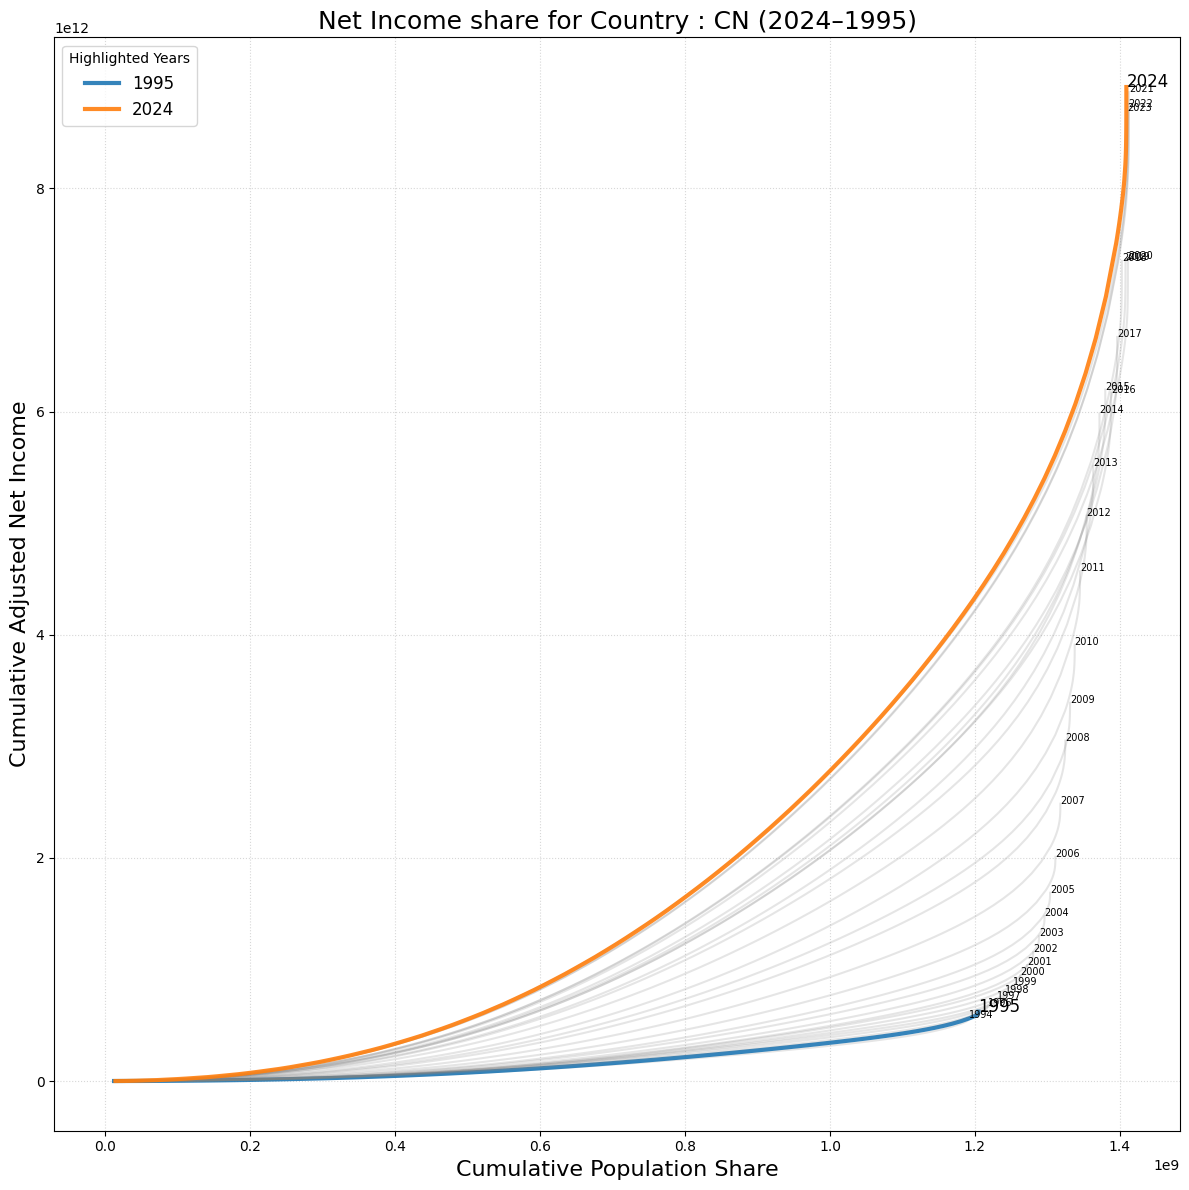

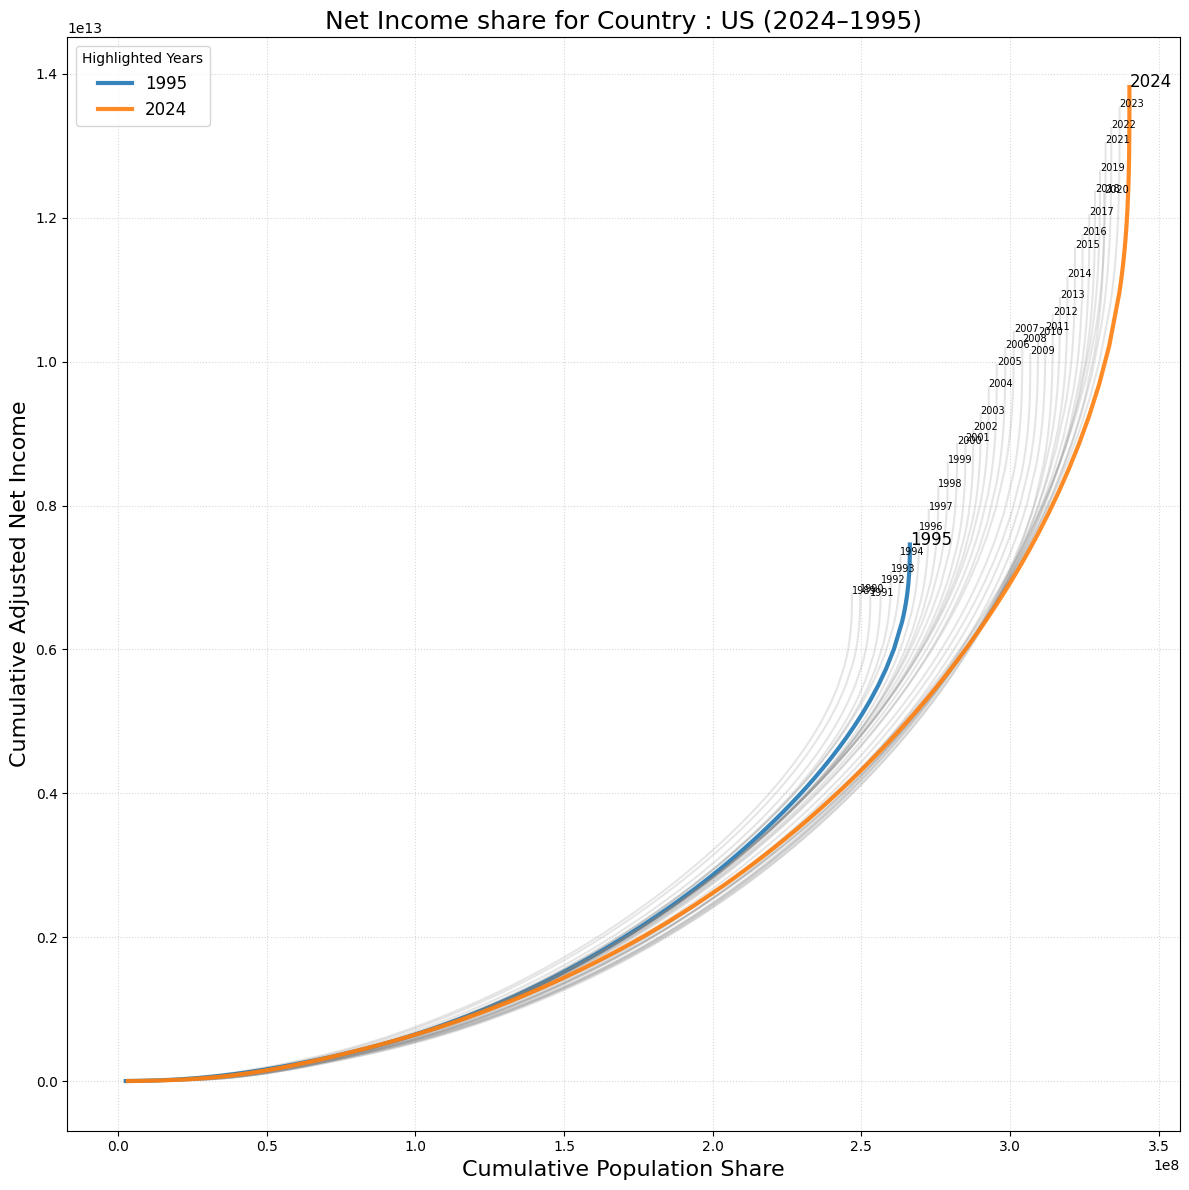

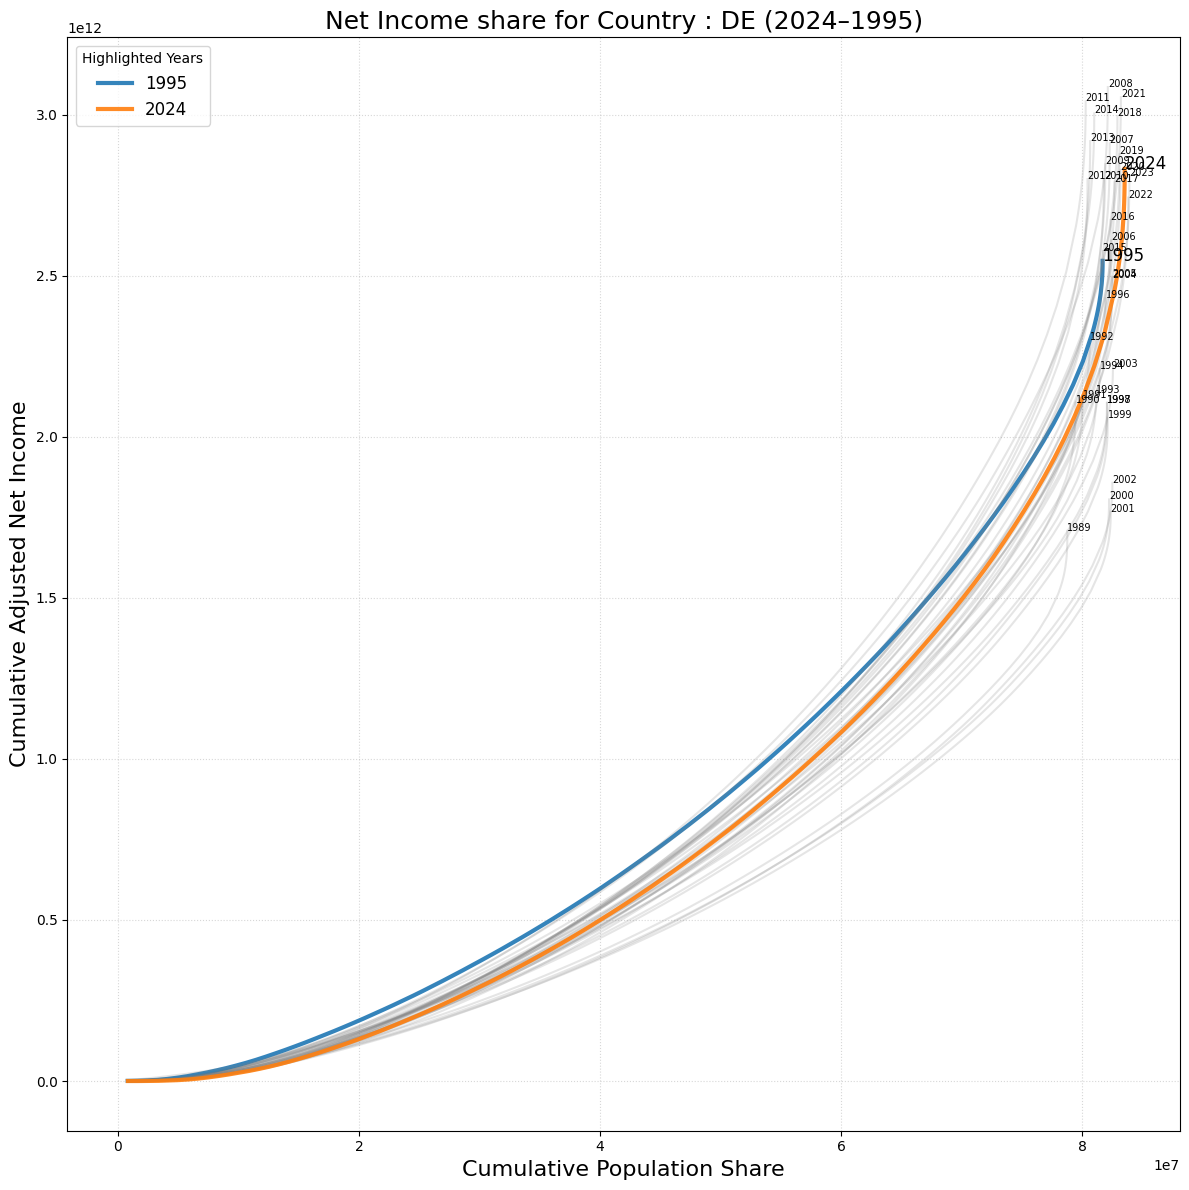

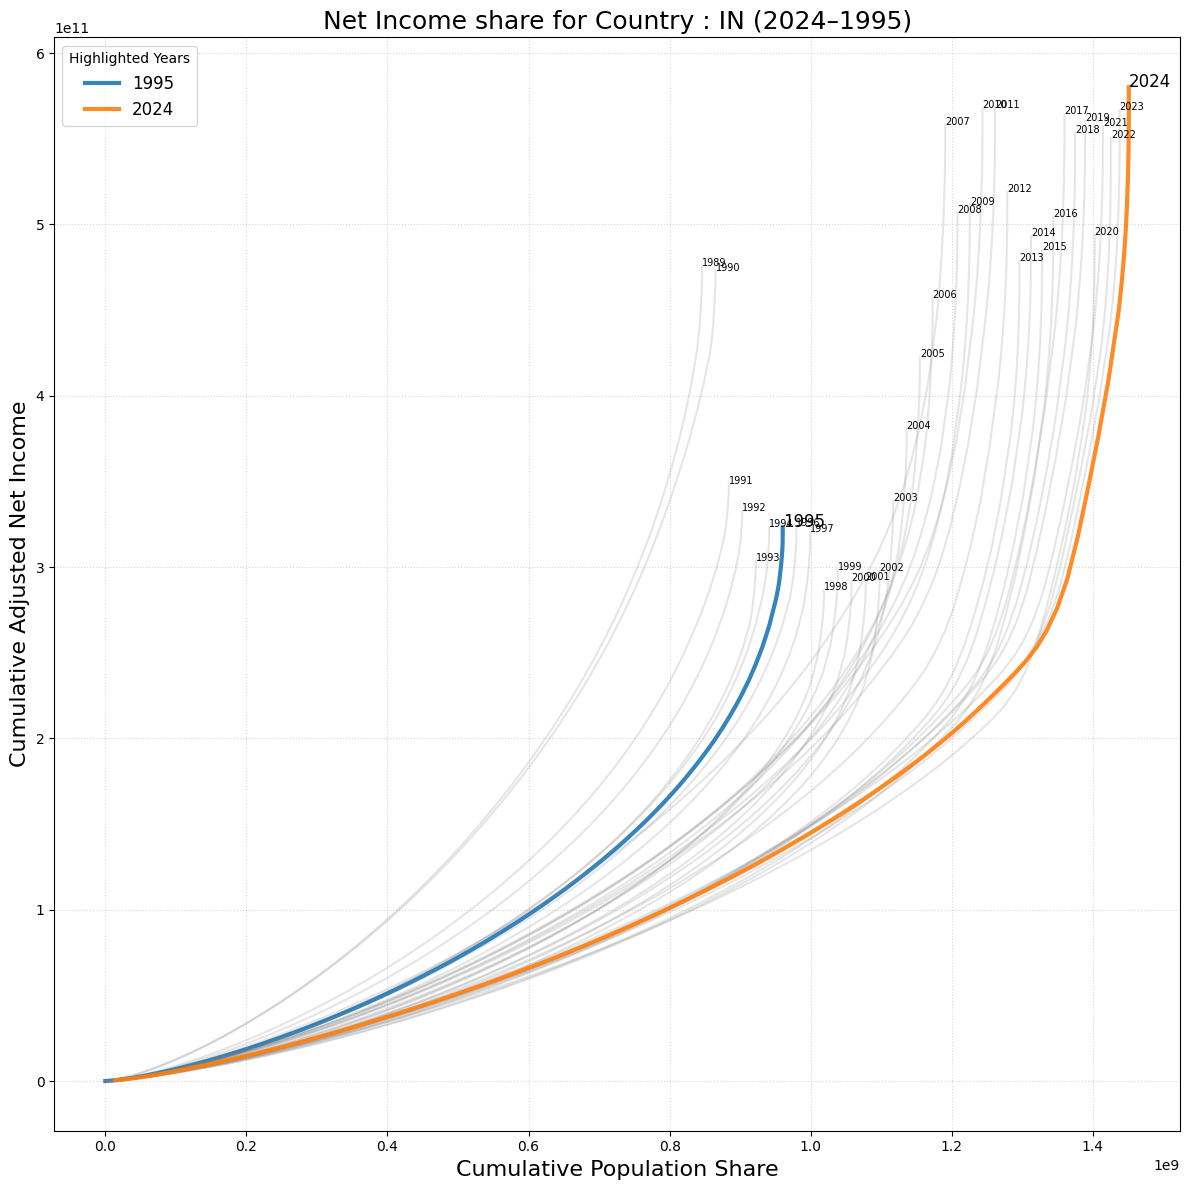

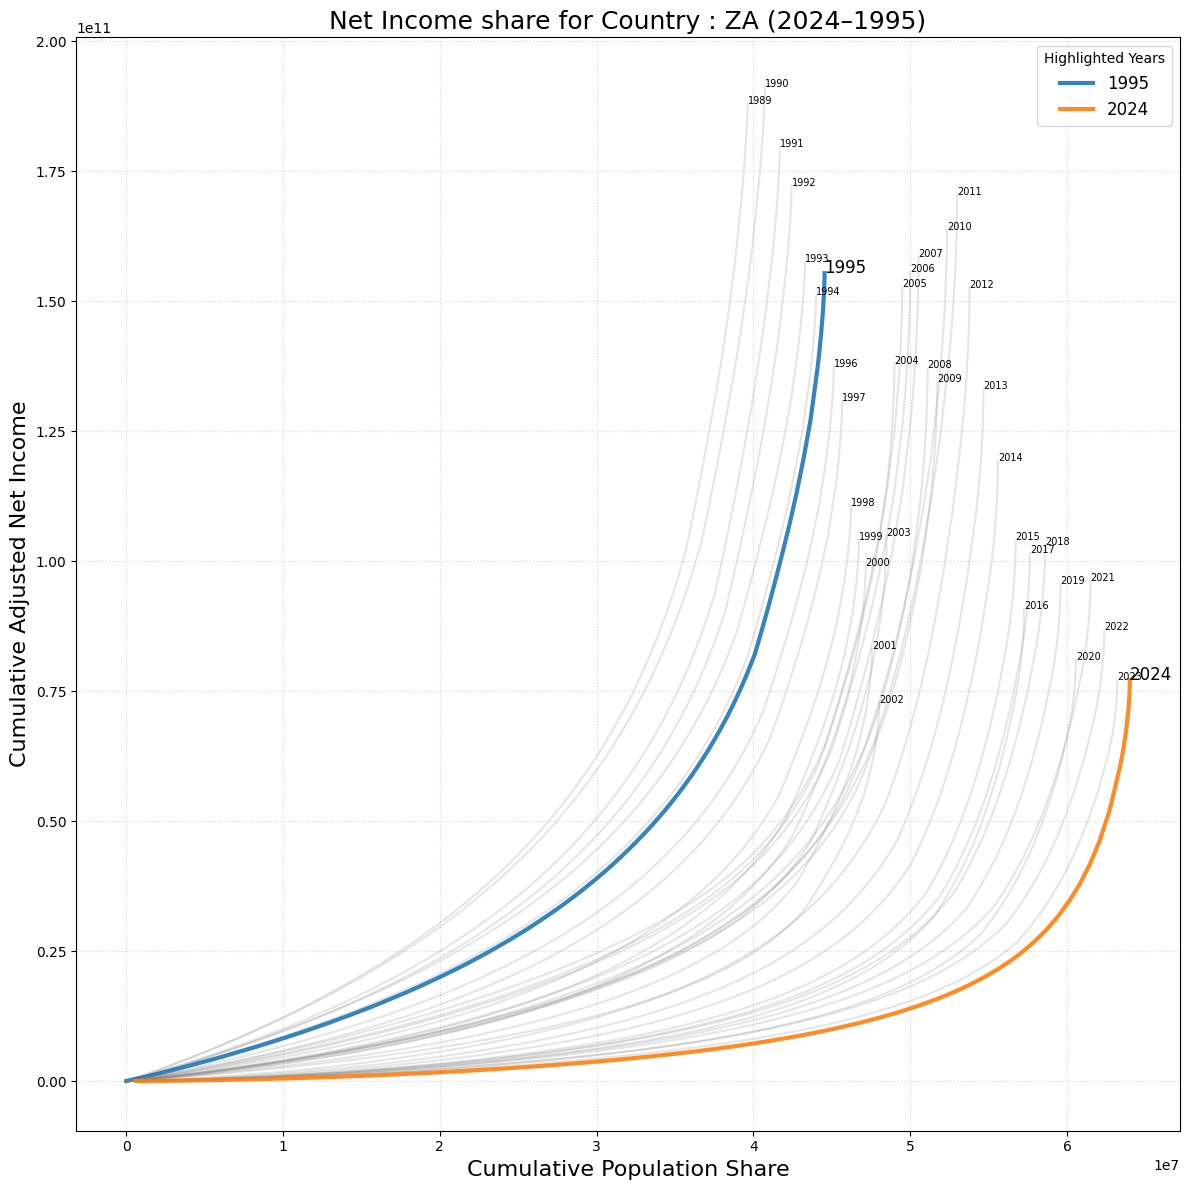

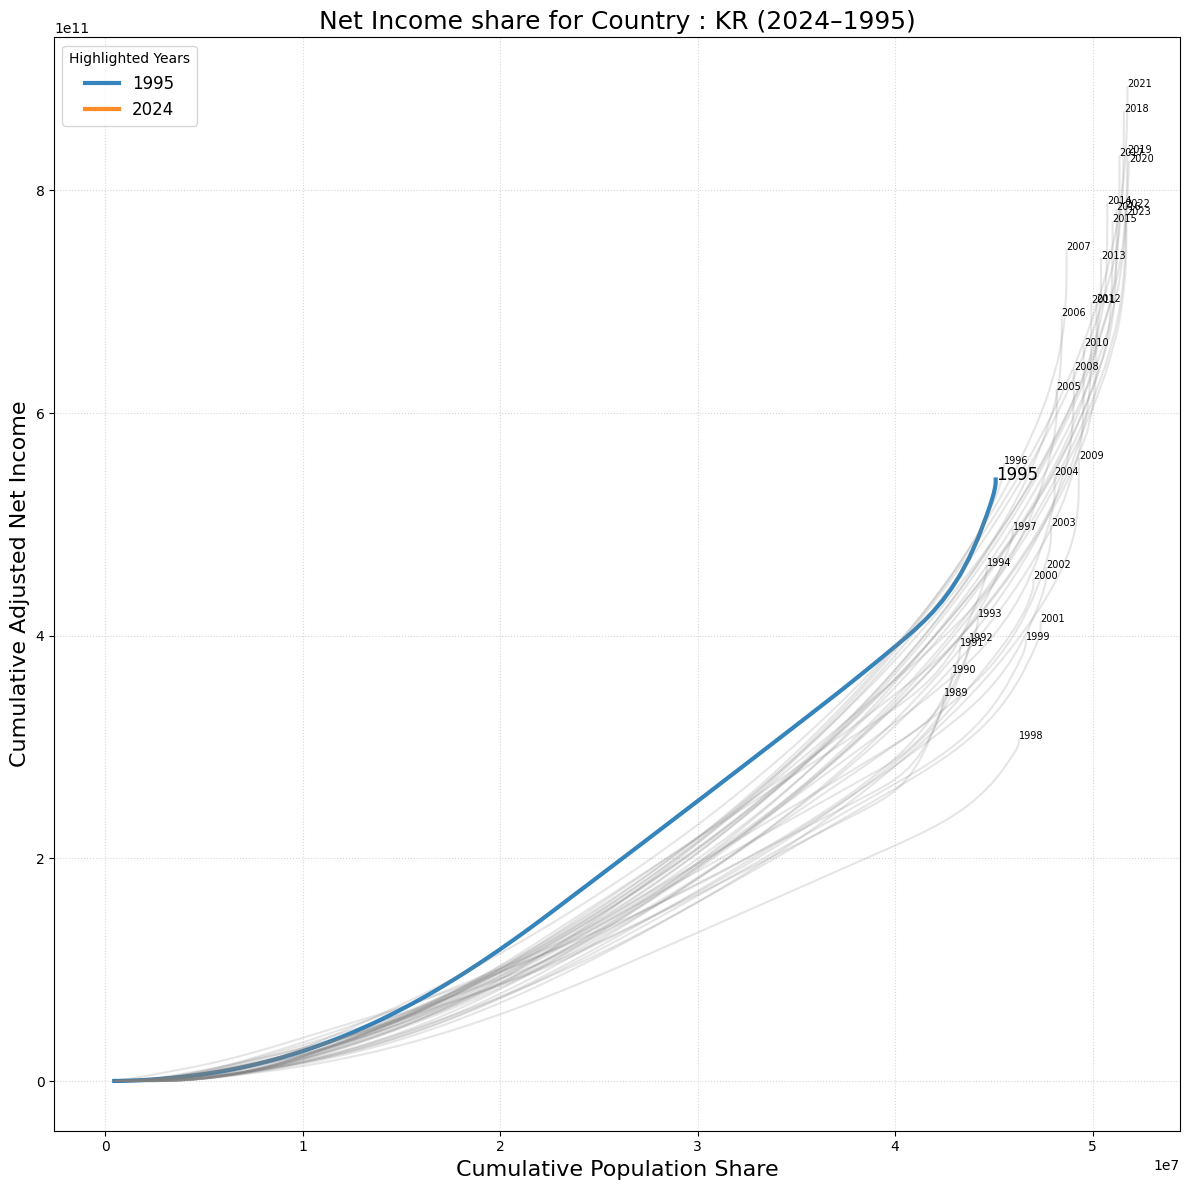

In [104]:
import matplotlib.pyplot as plt
import numpy as np

country_code = ['CN', 'US', 'DE', 'IN', 'ZA', 'KR']
for code in country_code:

    # Get available years for IN
    years = sorted(df_all[df_all['country_code']==code]['year'].unique())

    # Choose key years to annotate
    first_year = 2024
    last_year = 1995
    middle_year = 1990

    plt.figure(figsize=(12,12))

    for year in years:
        df_cnt = df_all[(df_all['country_code']==code) & (df_all['year']==year)]
        df_cnt = df_cnt.sort_values('population_share')

        # Extremes shown boldly
        if year in [first_year, last_year]:
            plt.plot(df_cnt['population_share'], df_cnt['net_income_share'], linewidth=3,
                    label=f'{year}', alpha=0.9)
            # Add year label at end of curve
            plt.text(df_cnt['population_share'].iloc[-1] - 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=12)
        else:
            # Muted lines for in-between years
            plt.plot(df_cnt['population_share'], df_cnt['net_income_share'],
                    color="gray", alpha=0.2)
            plt.text(df_cnt['population_share'].iloc[-1] + 0.005,
                    df_cnt['net_income_share'].iloc[-1],
                    str(year), fontsize=7)

    # Plot perfect equality line
    plt.plot([0,1], [0,1], linestyle="--", color="black", linewidth=1)

    plt.title(f"Net Income share for Country : {code} ({first_year}–{last_year})", fontsize=18)
    plt.xlabel("Cumulative Population Share", fontsize=16)
    plt.ylabel("Cumulative Adjusted Net Income", fontsize=16)
    plt.grid(True, linestyle=":", alpha=0.5)
    plt.legend(title="Highlighted Years", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"Net_Income_share_cured_{code}.png")
    plt.show()

### Check Overall Missing Values in Merged Data

This cell calculates and displays the total count of missing (NaN) values for each column across the entire `df_merge` DataFrame. This provides a comprehensive overview of data completeness after merging the income distribution and macroeconomic indicator datasets, guiding further data preparation steps.

In [105]:
df_merge.isna().sum()

country_code                          0
year                                  0
bottom_50%                            0
top_0.1%                              0
top_1%                                0
top_10%                               0
country                               0
gdp_percap_const                      1
unemployment_pct                     12
inflation_pct                         5
national_income                       1
education_atainment                  91
ppp_to_usd                            6
fx_to_usd                             0
trade_pct_gdp                         1
population                            0
inflation_factor                      5
cpi_index                             5
cpi_base                              0
national_income_per_adult_nominal     1
net_income_real_local                 6
national_income_real_usd              6
net_income_ppp                       11
net_income_usd_fx                     6
dtype: int64

### Visualize Correlation Matrices per Country

This cell generates and displays correlation matrices for the numerical features within `df_merge`, separately for each country:
- It iterates through each unique `country_code` in `df_merge`.
- For each country, it creates a subset DataFrame and drops non-numeric or identifying columns (`country_code`, `year`, `country`).
- A heatmap is generated using `seaborn.heatmap` to visualize the correlation coefficients between all remaining numerical variables.
- `annot=True` displays the correlation values on the heatmap, and `cmap='coolwarm'` provides a diverging color scheme.
- Each correlation matrix is titled by country and saved as a PNG file, providing insights into the relationships between economic indicators and income shares within each nation.

### Explore Relationship Between Indicators and Bottom 50% Income Share

This cell generates a series of scatter plots to visually investigate the relationship between various economic indicators and the `bottom_50%` income share for selected countries:
- It defines `x_vars` (economic indicators like `trade_pct_gdp`, `gdp_percap_const`, `unemployment_pct`, `inflation_pct`) and `y_var` (`bottom_50%`).
- It filters `df_merge` for the specified `countries_to_plot`.
- A grid of subplots is created, with one row for each `x_var`.
- Each scatter plot shows the relationship between an indicator and the `bottom_50%` share, with different colors and styles representing each country.
- Titles, labels, legend, and grid are added for clarity, and `plt.tight_layout()` adjusts spacing.

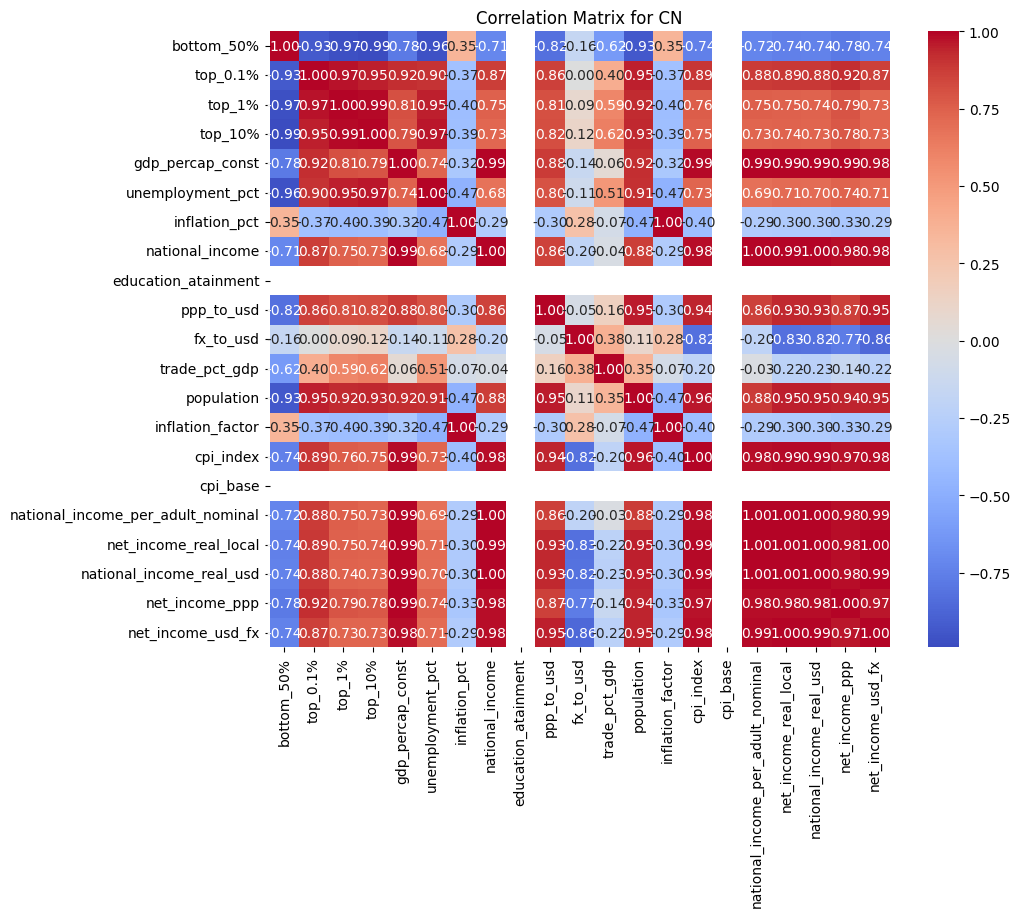

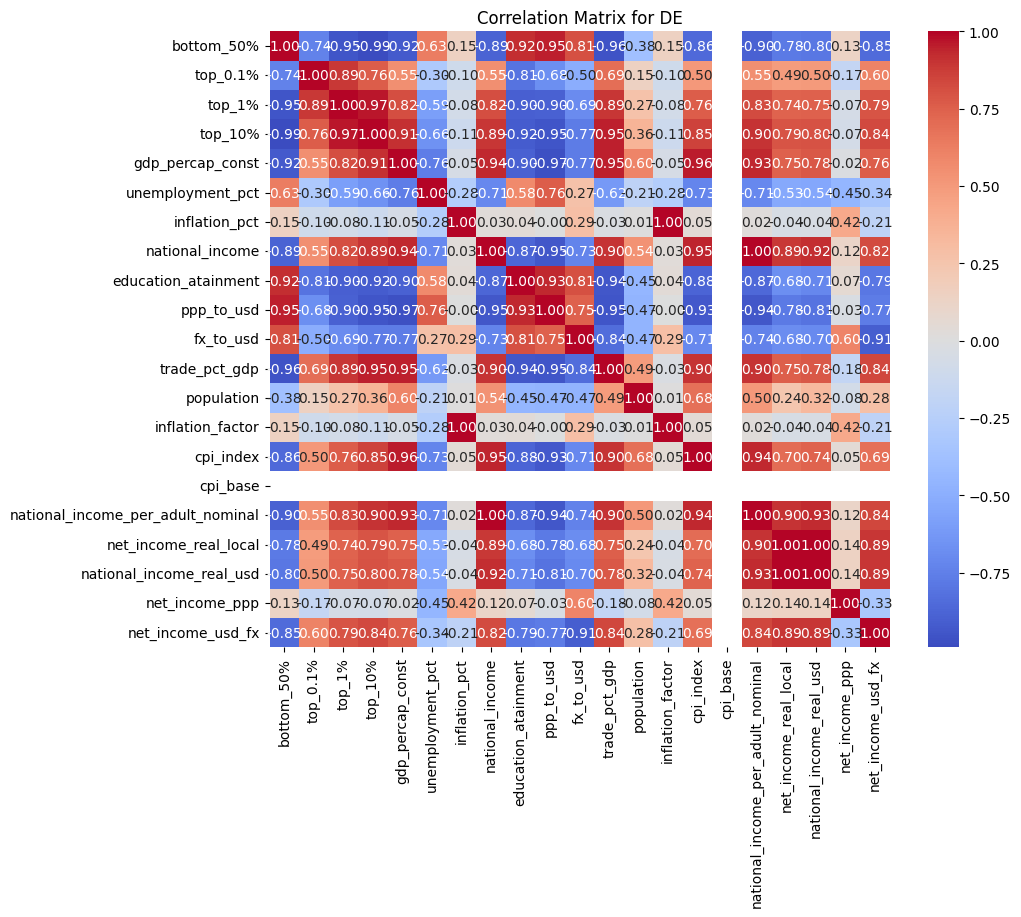

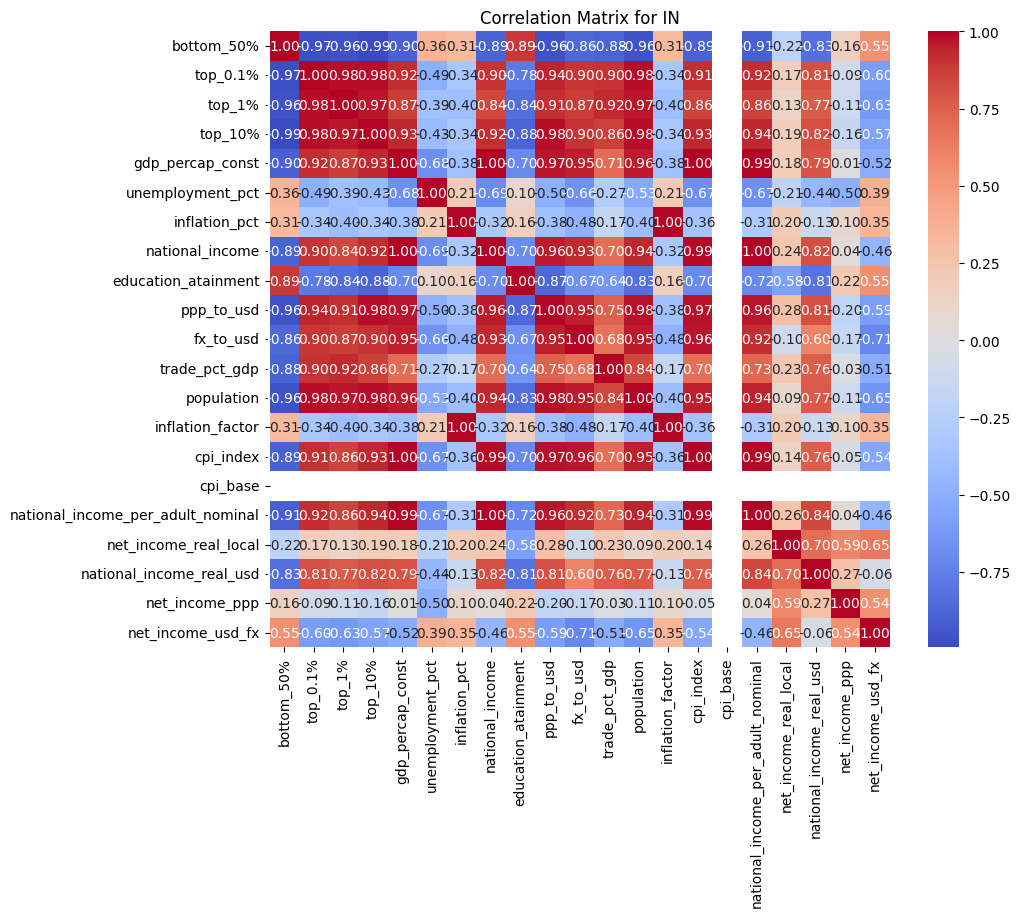

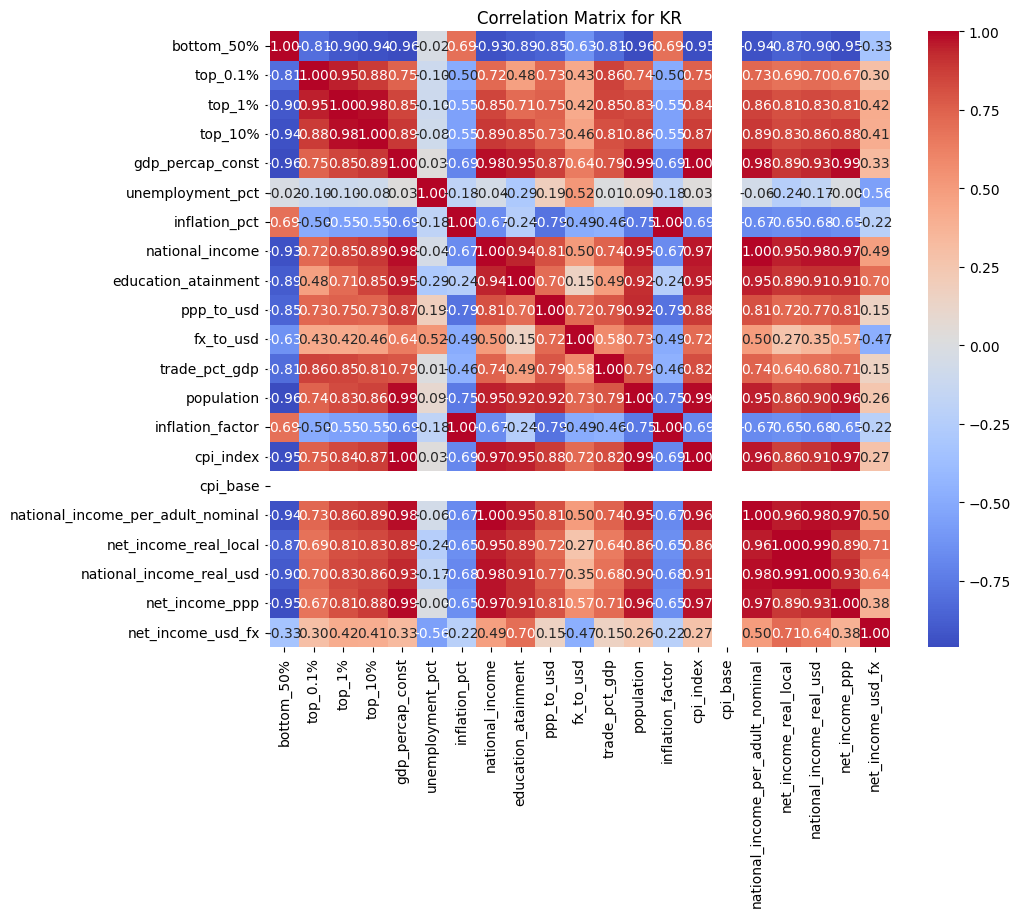

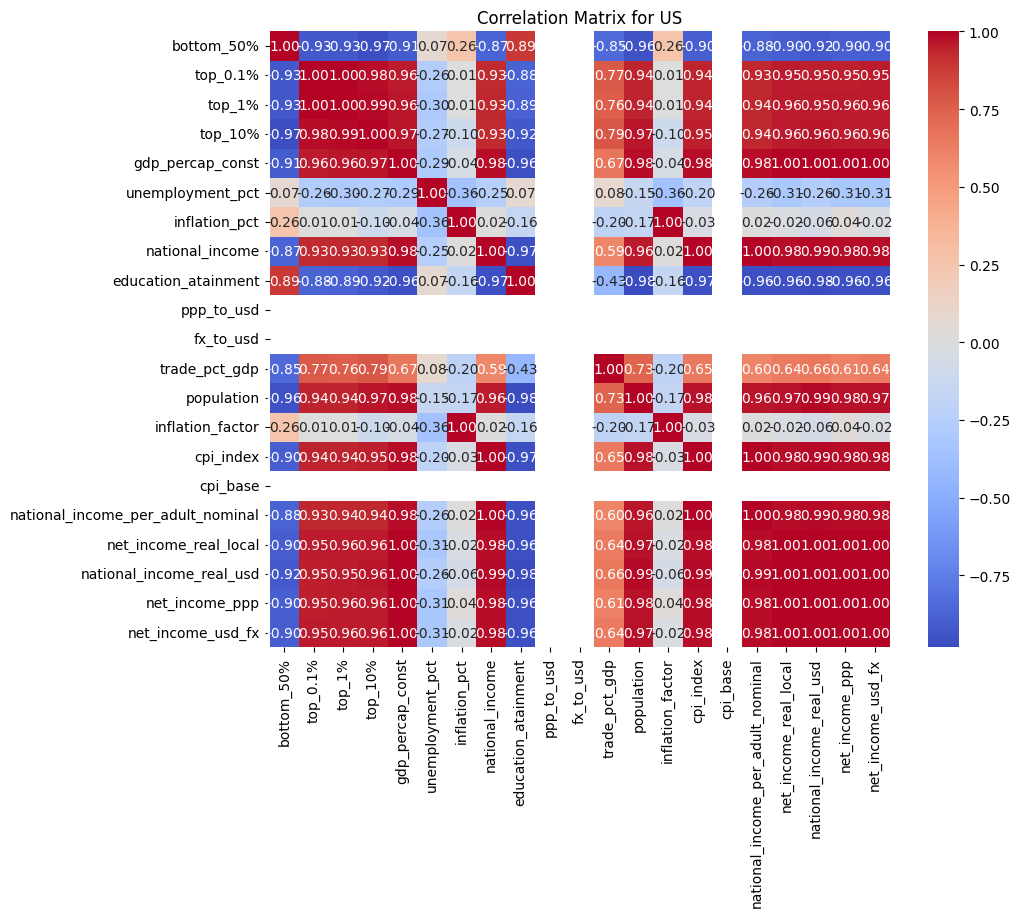

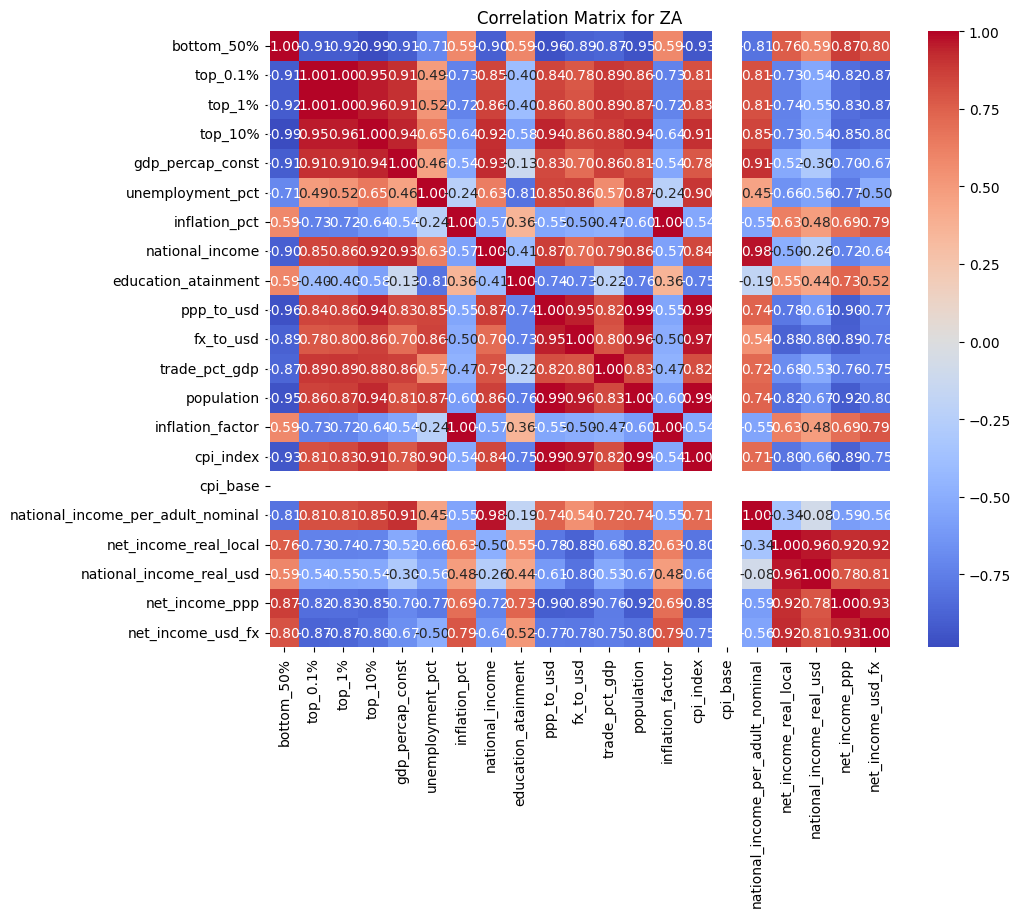

In [106]:
import matplotlib.pyplot as plt

# plot correlation matrix for all the features
import seaborn as sns

for code in df_merge['country_code'].unique():
    country_data = df_merge[df_merge['country_code'] == code]
    df_corr = country_data.drop(columns=['country_code', 'year', 'country']) # Drop non-numeric columns for correlation
    # plot correlation matrix for all the features
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

    plt.title(f'Correlation Matrix for {code}')
    plt.savefig(f"correlation_{code}.png")
    plt.show()



### Prepare Data for Regression Analysis

This cell prepares the `df_merge` DataFrame for linear regression modeling:
- It defines `countries_to_analyze`, `feature_cols` (independent variables), and `target_col` (`top_10%` income share).
- It filters `df_merge` to include only the specified `countries_to_analyze`.
- Crucially, it drops any rows that have missing values (`NaN`) in *either* the feature columns or the target column. This ensures that the regression model receives complete data.
- The shape of the resulting `df_ml` DataFrame and its first few rows are printed to confirm the data preparation.

In [107]:
countries_to_analyze = ['CN', 'IN', 'US', 'DE', 'ZA', 'KR']
feature_cols = ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct', 'inflation_pct']
target_col = 'top_10%'

# Filter for selected countries
df_ml = df_merge[df_merge['country_code'].isin(countries_to_analyze)].copy()

# Drop rows with missing values in features or target
df_ml = df_ml.dropna(subset=feature_cols + [target_col])

print(f"Shape of prepared data: {df_ml.shape}")
df_ml.head()

Shape of prepared data: (200, 24)


country_code  year  bottom_50%  top_0.1%  top_1%  top_10% country  \
5           CN  1994      0.1811    0.0371  0.0954   0.3433   China   
6           CN  1995      0.1849    0.0365  0.0938   0.3390   China   
7           CN  1996      0.1906    0.0381  0.0965   0.3391   China   
8           CN  1997      0.1909    0.0376  0.0965   0.3392   China   
9           CN  1998      0.1915    0.0391  0.0994   0.3425   China   

   gdp_percap_const  unemployment_pct  inflation_pct  ...  trade_pct_gdp  \
5       1406.858457              2.90      24.256990  ...      35.605464   
6       1545.194294              3.00      16.791225  ...      34.104952   
7       1681.627435              3.12       8.313160  ...      33.628751   
8       1819.097893              3.23       2.786465  ...      34.313576   
9       1944.437197              3.24      -0.773186  ...      32.171740   

   population  inflation_factor  cpi_index  cpi_base  \
5  1191835000          1.242570   1.242570   1.24257   
6  1204855000          1.167912   1.451213   1.24257   
7  1217550000          1.083132   1.571854   1.24257   
8  1230075000          1.027865   1.615653   1.24257   
9  1241935000          0.992268   1.603161   1.24257   

   national_income_per_adult_nominal  net_income_real_local  \
5                         474.809504             474.809504   
6                         602.909100             516.228081   
7                         703.121960             555.826463   
8                         777.797865             598.190311   
9                         821.694165             636.874387   

   national_income_real_usd  net_income_ppp  net_income_usd_fx  
5              5.658946e+11     1676.927976          55.090345  
6              6.219800e+11     1587.303694          61.813235  
7              6.767465e+11     1626.755359          66.852870  
8              7.358189e+11     1746.770337          72.159655  
9              7.909566e+11     1893.820837          76.926874  

[5 rows x 24 columns]

## Train and Evaluation

Train a Linear Regression model for each country, evaluate performance, and visualize results including coefficients.


### Hypothesis Testing for Linear Regression Models

To conduct a more formal hypothesis test on the significance of each feature's coefficient, we will use the `statsmodels` library. This library provides a comprehensive summary of the regression results, including p-values for each coefficient, which helps determine if there is a statistically significant relationship between the feature and the target variable.

In [108]:
import statsmodels.api as sm

# Iterate through each country to perform OLS regression and hypothesis testing
for country in countries_to_analyze:
    print(f"--- Hypothesis Testing for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]
    print(len(country_df))

    # Define features and target
    X = country_df[feature_cols]
    y = country_df[target_col]

    # Add a constant to the independent variable for the intercept term
    X = sm.add_constant(X)

    # Create and fit the OLS model
    model_sm = sm.OLS(y, X).fit()

    # Print the summary of the regression results
    print(model_sm.summary())
    print("\n" + "="*80 + "\n")

--- Hypothesis Testing for CN ---
31
                            OLS Regression Results                            
Dep. Variable:                top_10%   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     242.9
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           3.50e-20
Time:                        21:28:06   Log-Likelihood:                 116.96
No. Observations:                  31   AIC:                            -223.9
Df Residuals:                      26   BIC:                            -216.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
con

## Concluding Analysis of Hypothesis Test

While the models generally demonstrate remarkable explanatory power (with R-squared values consistently above 0.96 for China, India, US, and South Africa), the individual significance and directional impacts of our chosen variables present a unique picture.

**Consistent Drivers of Top Income Share:**

*   **GDP per capita** emerges as a robust predictor across almost all nations. Its positive coefficients, often with very low p-values, confirm that per capita GDP is strongly correlated with an increasing inequality. This effect is particularly pronounced in developing economies like India and South Africa.

*   **Trade Percentage of GDP** also frequently shows a significant positive correlation, indicating that increased economic openness and trade activity tend to benefit the top income earners, especially evident in China and the US.

**Varying and Complex Relationships:**

*   **Unemployment Percentage** has a dual nature. In countries like China, India, and South Africa, higher unemployment significantly correlates with an *increase* in top 10%'s income share, suggesting that a weaker labor market might exacerbate income concentration.

    Conversely, in US, higher unemployment significantly correlated with a *decrease* in the top 10% share. This difference underscores diverse macroeconomic structures & social safety nets across nations.

*   **Inflation Percentage** has a varied impact. While largely non-significant in China, India, and the US, it shows a significant negative relationship in South Africa. This implies that for some economies, higher inflation may erode the real income share of the wealthiest, or at least not contribute to its growth as directly as other factors.

**Key Takeaways and Confidence:**

We can be highly confident (p < 0.05, often p < 0.001) in the significant influence of GDP per capita, trade and unemployment on the top 10% income share.

The consistent presence of multicollinearity, however, advises caution in isolating the precise magnitude of each individual coefficient's effect, suggesting that these economic factors often move in tandem.

### Define Feature Exclusion Map Based on Hypothesis Testing

This cell creates a dictionary `exclusion_map` that specifies which features should be excluded from the linear regression models for each country. This decision is based on the p-values obtained from the previous OLS regression (hypothesis testing):
- For countries like China, India, and the US, `inflation_pct` is excluded due to its high p-value (indicating non-significance).
- For South Africa, `trade_pct_gdp` is excluded.
This step aims to simplify the models and retain only statistically significant predictors for each country before training the final models.

In [112]:
# P-value thresholds for exclusion (based on previous OLS summary)
# Features with p-value > 0.1 will be excluded for each country
exclusion_map = {
    'CN': ['inflation_pct'], # inflation_pct p-value: 0.220
    'IN': ['inflation_pct'], # inflation_pct p-value: 0.850
    'US': ['inflation_pct'], # inflation_pct p-value: 0.272
    'KR': ['unemployment_pct','inflation_pct'], # inflation_pct p-value: 0.770
    'ZA': ['trade_pct_gdp'] # trade_pct_gdp p-value: 0.136
}

### Train and Evaluate Linear Regression Models per Country

This cell iterates through each country to train and evaluate a Linear Regression model for predicting the `top_10%` income share, excluding features deemed insignificant in the hypothesis test:
- It initializes dictionaries to store models and plot data.
- For each country, it filters the data and determines which `feature_cols` to use based on the `exclusion_map`.
- The feature data `X` is scaled using `StandardScaler` to normalize their ranges, which can improve model performance and interpretability of coefficients.
- Data is split into training (80%) and testing (20%) sets using `train_test_split`.
- A `LinearRegression` model from `sklearn` is initialized and trained on the scaled training data.
- Predictions are made on the test set, and the model's performance is evaluated using `mean_squared_error` (MSE) and `r2_score`.
- Model coefficients are displayed, showing the impact of each feature on the target variable.
- Test data and predictions are stored for subsequent plotting.

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import statsmodels.api as sm

models = {}
plot_data = [] # List to store data for plotting

# Iterate through each country
for country in countries_to_analyze:
    print(f"--- Analysis for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]

    # Check if there is enough data points
    if len(country_df) < 5:
        print(f"Not enough data to train model for {country} (n={len(country_df)})")
        continue

    # Determine which features to use based on p-value exclusion
    features_to_exclude = exclusion_map.get(country, [])
    current_feature_cols = [f for f in feature_cols if f not in features_to_exclude]

    if not current_feature_cols:
        print(f"No features left for {country} after exclusion. Skipping model training.")
        continue

    # Define features and target
    X = country_df[current_feature_cols]
    y = country_df[target_col]

    print(f"Using features for {country}: {current_feature_cols}")

    # Initialize and fit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[country] = model

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R-squared: {r2:.4f}")

    # Coefficients
    coef_df = pd.DataFrame({
        'Feature': current_feature_cols,
        'Coefficient': model.coef_
    })
    print("\nModel Coefficients:")
    display(coef_df)

    # Store data for plotting later
    plot_data.append({
        'country': country,
        'y_test': y_test,
        'y_pred': y_pred
    })
    print("\n" + "="*40 + "\n")

--- Analysis for CN ---
Using features for CN: ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct']
Mean Squared Error: 0.000100
R-squared: 0.4515

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.014466
1  gdp_percap_const     0.020051
2  unemployment_pct     0.012407



--- Analysis for IN ---
Using features for IN: ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct']
Mean Squared Error: 0.000122
R-squared: 0.9712

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.023966
1  gdp_percap_const     0.077769
2  unemployment_pct     0.024035



--- Analysis for US ---
Using features for US: ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct']
Mean Squared Error: 0.000027
R-squared: 0.8102

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.006127
1  gdp_percap_const     0.018620
2  unemployment_pct    -0.001969



--- Analysis for DE ---
Using features for DE: ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct', 'inflation_pct']
Mean Squared Error: 0.000036
R-squared: 0.9087

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.032003
1  gdp_percap_const    -0.007803
2  unemployment_pct    -0.008107
3     inflation_pct    -0.005543



--- Analysis for ZA ---
Using features for ZA: ['gdp_percap_const', 'unemployment_pct', 'inflation_pct']
Mean Squared Error: 0.000117
R-squared: 0.9476

Model Coefficients:


Feature  Coefficient
0  gdp_percap_const     0.054228
1  unemployment_pct     0.019174
2     inflation_pct    -0.007630



--- Analysis for KR ---
Using features for KR: ['trade_pct_gdp', 'gdp_percap_const']
Mean Squared Error: 0.000395
R-squared: 0.7922

Model Coefficients:


Feature  Coefficient
0     trade_pct_gdp     0.010502
1  gdp_percap_const     0.031655

### Evaluation of Models: Actual vs. Predicted Plots

These plots visualize the performance of our Linear Regression models for each country. For each graph:

*   **X-axis (Actual Top 10% Share)**: Represents the true 'top 10%' income share values from the test dataset.
*   **Y-axis (Predicted Top 10% Share)**: Shows the 'top 10%' income share values predicted by our trained model.
*   **Blue Dots**: Each dot corresponds to an actual data point from the test set, with its predicted value on the Y-axis.
*   **Red Dashed Line**: This diagonal line represents a 'perfect prediction' scenario, where `Actual = Predicted`. The closer the blue dots are to this red line, the better the model's accuracy.

These plots help us visually assess how well each country's model generalizes to unseen data, indicating areas where predictions are accurate and where there might be discrepancies.

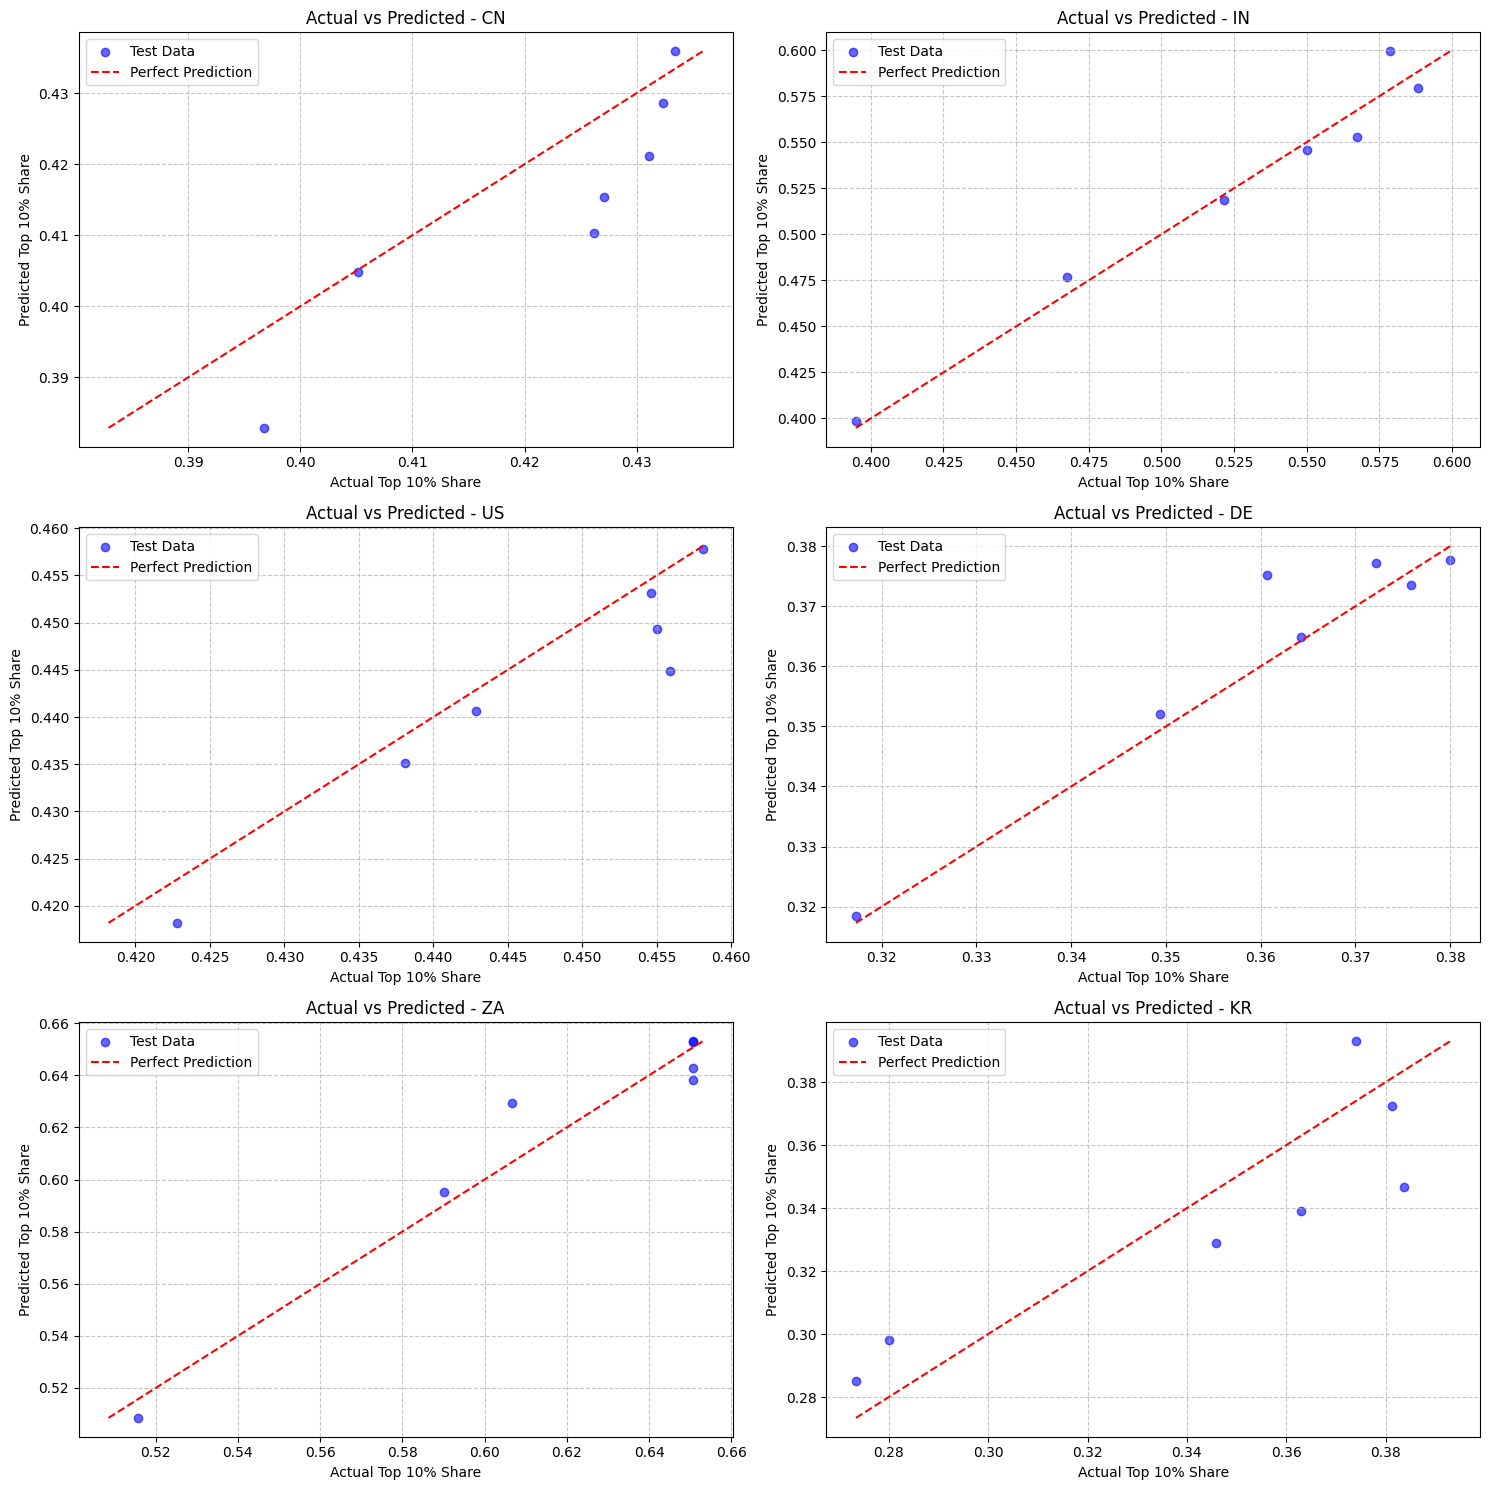

In [111]:
# Plot of 'Actual vs Predicted' graph of the countries
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, data in enumerate(plot_data):
    ax = axes[i]
    country = data['country']
    y_test = data['y_test']
    y_pred = data['y_pred']

    ax.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Test Data')

    # Plot diagonal line for reference
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

    ax.set_xlabel('Actual Top 10% Share')
    ax.set_ylabel('Predicted Top 10% Share')
    ax.set_title(f'Actual vs Predicted - {country}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Conclusion**: Leveraging the Model for Policy-Making to Combat Inequality

Our analysis and the developed Linear Regression models provide a powerful tool for understanding and simulating the proportion of wealth held by the top 10% richest individuals, which serves as a key indicator of income inequality within a country. By identifying the significant economic drivers—such as GDP per capita, trade percentage of GDP, and unemployment rates—these models offer a data-driven lens into the mechanisms that influence income concentration.


**Governments can utilize these models for:**

1.  **Forecasting Inequality Trends**: By inputting projected values for economic indicators, policymakers can simulate potential future scenarios for Wealth Inequality which allows governments to anticipate rising inequality and proactive policy interventions.
2.  **Impact Assessment of Economic Policies**: Before implementing new economic policies, their potential impact on income inequality can be assessed.
3.  **Targeted Interventions**: Helps understand which economic factors drive inequality in a country (determined by model's coeff & p-values) & enables govts. to design more effective interventions. For example, if unemployment significantly exacerbates the top 10% share (as in China, India, and SA), policies focused on job creation and social safety nets become critical.
4.  **Evidence-Based Decision Making**: By demonstrating the quantitative relationship between macroeconomic factors and income concentration, governments can advocate for policies with a clearer understanding of their expected outcomes.

---
# Rough Work

---